# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [3]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_plus = []
    X_train_minus =[]
    
    # splitting the train set according to Y values
    for i in range(0,len(Y_train)):
        if(Y_train[i]==-1):
            X_train_minus.append(X_train[i])
        else :
            X_train_plus.append(X_train[i])
    
    # finding mu+ and mu-
    mu_plus = np.mean(X_train_plus,axis = 0)
    mu_minus = np.mean(X_train_minus,axis = 0)
    
    #print(mu_plus,mu_minus)
    # P(Y=1/X) (Say Eta)  for the test data and predicting y
    # Assuming P(Y=1)=a and P(Y=-1)=1-a
    a = np.count_nonzero(Y_train == 1)/len(Y_train)
    # Initializing Y_test_pred 
    Y_test_pred = np.ones(len(X_test))
    for j in range(0,len(X_test)):
        term1 = np.linalg.norm(X_test[j]-mu_plus)
        term2 = np.linalg.norm(X_test[j]-mu_minus)
        #print(term1,term2)
        Eta = a*np.exp(-0.5*term1**2)/(a*np.exp(-0.5*term1**2)+(1-a)*np.exp(-0.5*term2**2))
        #print(Eta)
        if(Eta < 0.5):
            Y_test_pred[j]= -1
    
    return(Y_test_pred)
    
    
    
    
    
def Bayes1b(X_train, Y_train, X_test):
    X_train_plus = []
    X_train_minus =[]
    
    # splitting the train set according to Y values
    for i in range(0,len(Y_train)):
        if(Y_train[i]==-1):
            X_train_minus.append(X_train[i])
        else :
            X_train_plus.append(X_train[i])
    
    # finding mu+ and mu-
    mu_plus = np.mean(X_train_plus,axis = 0)
    mu_minus = np.mean(X_train_minus,axis = 0)
    
    #print(mu_plus,mu_minus)
    cov_minus = np.cov(X_train_minus,rowvar = False,bias = True)
    cov_plus = np.cov(X_train_plus,rowvar = False ,bias = True)
    #finding the ML Estimate of covariance
    cov = (len(X_train_minus)*cov_minus + len(X_train_plus)*cov_plus)/len(X_train)
    #print(cov)
    
    # P(Y=1/X) (Say Eta)  for the test data and predicting y
    # Assuming P(Y=1)=a and P(Y=-1)=1-a
    a = np.count_nonzero(Y_train == 1)/len(Y_train)
    # Initializing Y_test_pred 
    Y_test_pred = np.ones(len(X_test))
    
    for j in range(0,len(X_test)):
        term1 = np.dot(np.dot(np.transpose(X_test[j]-mu_minus),np.linalg.inv(cov)),X_test[j]-mu_minus)
        term2 = np.dot(np.dot(np.transpose(X_test[j]-mu_plus),np.linalg.inv(cov)),X_test[j]-mu_plus)

        Eta = 1.0/(1+(1-a)/a*np.exp(-0.5*(term1-term2)))
        #print(Eta)
        if(Eta < 0.5):
            Y_test_pred[j]= -1
    
    return(Y_test_pred)



def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_plus = []
    X_train_minus =[]
    
    # splitting the train set according to Y values
    for i in range(0,len(Y_train)):
        if(Y_train[i]==-1):
            X_train_minus.append(X_train[i])
        else :
            X_train_plus.append(X_train[i])
    
    # finding mu+ and mu-
    mu_plus = np.mean(X_train_plus,axis = 0)
    mu_minus = np.mean(X_train_minus,axis = 0)
    
    #print(mu_plus,mu_minus)
    
    #finding the covariance
    cov_minus = np.cov(X_train_minus,rowvar = False,bias = True)
    #print(cov_minus)
    cov_plus = np.cov(X_train_plus,rowvar = False ,bias = True)
    #print(cov_plus)
    
    # P(Y=1/X) (Say Eta)  for the test data and predicting y
    # Assuming P(Y=1)=a and P(Y=-1)=1-a
    a = np.count_nonzero(Y_train == 1)/len(Y_train)
    # Initializing Y_test_pred 
    Y_test_pred = np.ones(len(X_test))
    # dividing by determinants is remaining
    for j in range(0,len(X_test)):
        term1 = np.dot(np.dot(np.transpose(X_test[j]-mu_minus),np.linalg.inv(cov_minus)),X_test[j]-mu_minus)
        term2 = np.dot(np.dot(np.transpose(X_test[j]-mu_plus),np.linalg.inv(cov_plus)),X_test[j]-mu_plus)

        Eta = 1.0/(1+(1-a)/a*np.sqrt(np.linalg.det(cov_plus))/np.sqrt(np.linalg.det(cov_minus))*np.exp(-0.5*(term1-term2)))
        #print(Eta)
        if(Eta < 0.5):
            Y_test_pred[j]= -1
    
    return(Y_test_pred)





In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

#print(Y_pred_test_1a)
#print(np.count_nonzero((Y_test-Y_pred_test_1a)==0))

#print(X_train)

#i = 'dataset1_1.npz'
#a = np.load(i)
#print(a['arr_0'])

**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


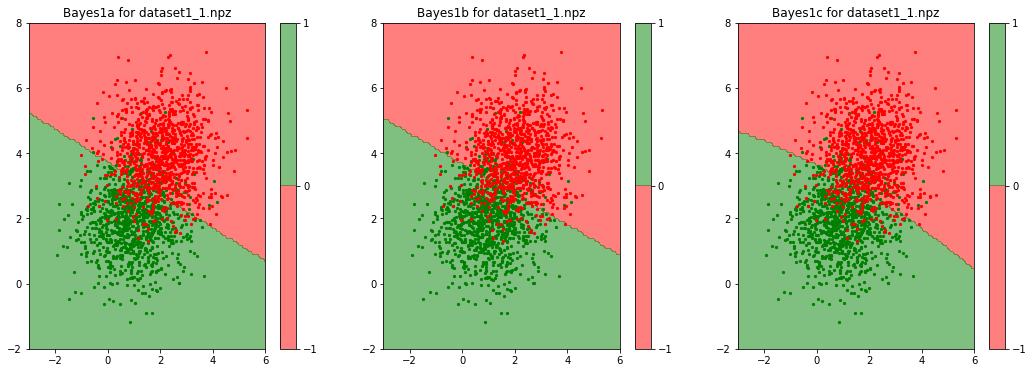

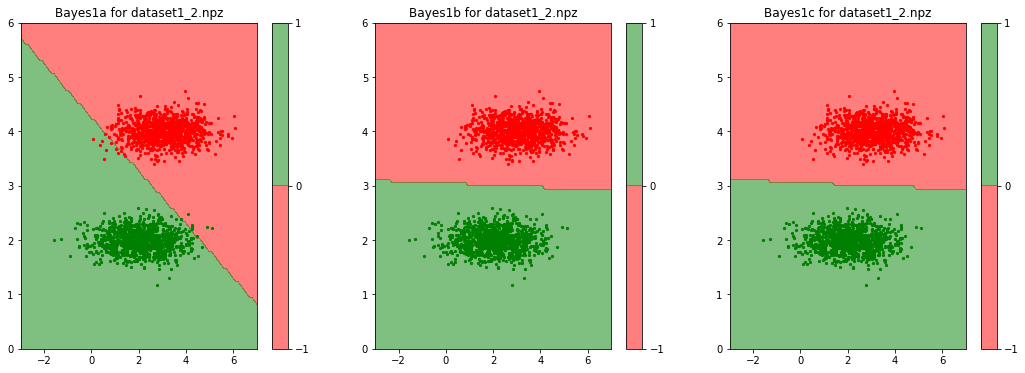

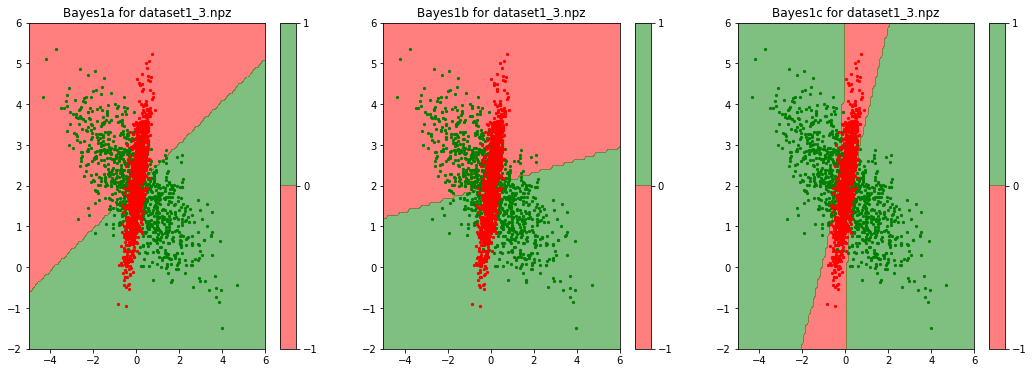

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

# Loading the data.....

data_names = ['dataset1_1.npz','dataset1_2.npz','dataset1_3.npz']
#d_s_1=np.load('dataset1_1.npz')
#d_s_2=np.load('dataset1_2.npz')
#d_s_3=np.load('dataset1_3.npz')
for data_set in data_names :
    d_s_2   = np.load(data_set)
    X_train = d_s_2['arr_0']
    Y_train = d_s_2['arr_1']
    X_test  = d_s_2['arr_2']
    Y_test  = d_s_2['arr_3']
    
    X_train_plus = np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i]==1])
    X_train_minus = np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i]==-1])
    
    # splitting the train set according to Y values
    #for i in range(0,len(Y_train)):
    #    if(Y_train[i]==-1):
    #        X_train_minus.append(X_train[i])
    #    else :
    #        X_train_plus.append(X_train[i])
    
    #print(X_train_plus)
    # limits for plotting
    max_0   = round(np.max(X_train[:,0]))+1
    min_0   = round(np.min(X_train[:,0]))-1
    lim_0  = np.linspace(min_0,max_0,100)
    max_1   = round(np.max(X_train[:,1]))+1
    min_1   = round(np.min(X_train[:,1]))-1
    lim_1  = np.linspace(min_1,max_1,100)
    X_test_1,X_test_2 = np.meshgrid(lim_0,lim_1)

    Y_test_gr_a = np.zeros(X_test_1.shape)
    Y_test_gr_b = np.zeros(X_test_1.shape)
    Y_test_gr_c = np.zeros(X_test_1.shape)


    for i in range(Y_test_gr_a.shape[0]):
        X_test_gr = np.concatenate((X_test_1[i,:],X_test_2[i,:]))
        X_test_gr = X_test_gr.reshape(2,Y_test_gr_a.shape[0])
        X_test_gr = np.transpose(X_test_gr)
        Y_test_gr_a[i,:] = Bayes1a(X_train,Y_train,X_test_gr)
        Y_test_gr_b[i,:] = Bayes1b(X_train,Y_train,X_test_gr)
        Y_test_gr_c[i,:] = Bayes1c(X_train,Y_train,X_test_gr)

        # print(X_test_gr)
    
    plt.figure(figsize=(18,6))
    
    plt.subplot(1,3,1)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_a,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.title('Bayes1a '+'for '+ str(data_set))
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s = 5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r', s = 5)
    plt.colorbar(d)
    
    plt.subplot(1,3,2)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_b,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s=5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r',s=5)
    plt.title('Bayes1b '+'for '+ str(data_set))
    plt.colorbar(d)
    
    plt.subplot(1,3,3)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_c,levels =np.arange(-1,2),colors = ('r','g'),alpha =0.5)
    plt.scatter(X_train_plus[:,0],X_train_plus[:,1],color = 'g',s=5)
    plt.scatter(X_train_minus[:,0],X_train_minus[:,1],color = 'r',s=5)
    plt.title('Bayes1c '+'for '+ str(data_set))
    plt.colorbar(d)
    
    #Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)
    #print(Y_pred_test_1a)
    #print(np.count_nonzero((Y_test-Y_pred_test_1a)==0))
    #print(Y_pred_test_1b)
    #print(np.count_nonzero((Y_test-Y_pred_test_1b)==0))
    # print(Y_pred_test_1c)
    # print(np.count_nonzero((Y_test-Y_pred_test_1c)==0))

    # print(np.count_nonzero(Y_test==1))

    # print(d_s_1['arr_0'])

** Cell type : TextWrite ** 
(Write your observations and table of errors here)


## Observations 

From the plots it is evident, that :

1) Bayes1c is working better for both the data sets

2) If the data is distributed as Normal with unknown mean $\mu_a$ and known covariance $I$, then Bayes1a works fine.

3) If the data is distributed as Normal with unknown mean $\mu_a$ and unknown covariance $\Sigma$, then Bayes1b works fine.

4) If no extra information is given regarding the data, it's better to use Bayes2c classifier.


# Error tables
| Error % | Data Set 1 | Data Set 2 | Data Set 3 |
|---------|------------|------------|------------|
| Bayes1a |    12.6    |    0.85    |    49.7    |
| Bayes1b |    12.45   |      0     |    49.5    |
| Bayes1c |    12.45   |      0     |    13.5    |



** Cell type : TextRead ** 

# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_train_1 = []
    X_train_2 = []
    X_train_3 = []
    X_train_4 = []    
    # splitting the train set according to Y values
    for i in range(0,len(Y_train)):
        if(Y_train[i]==1):
            X_train_1.append(X_train[i])
        elif(Y_train[i]==2) :
            X_train_2.append(X_train[i])
        elif(Y_train[i]==3) :
            X_train_3.append(X_train[i])
        else :
            X_train_4.append(X_train[i])
    # finding mu+ and mu-
    mu_1 = np.mean(X_train_1,axis = 0)
    mu_2 = np.mean(X_train_2,axis = 0)
    mu_3 = np.mean(X_train_3,axis = 0)
    mu_4 = np.mean(X_train_4,axis = 0)
    mu   = np.array([mu_1,mu_2,mu_3,mu_4])
    #print(mu)
    # numerators of eta matrix
    #p_1,p_2,p_3,p_4 are the probabilities of y taking values 1,2,3,4 respectively
    p_1 = np.count_nonzero(Y_train == 1)/len(Y_train)
    p_2 = np.count_nonzero(Y_train == 2)/len(Y_train)
    p_3 = np.count_nonzero(Y_train == 3)/len(Y_train)
    p_4 = np.count_nonzero(Y_train == 4)/len(Y_train)
    p = np.array([p_1,p_2,p_3,p_4])
    
    #Loss matrix
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    Y_pred = np.ones(len(X_test))
    Eta_num = np.zeros(4)
    for j in range(len(X_test)):
        for i in range(4):
            Eta_num[i] = p[i]*np.exp(-0.5*np.dot(np.transpose(X_test[j]-mu[i]),X_test[j]-mu[i]))
        Eta_num = Eta_num/sum(Eta_num)
        Y_pred[j] =np.argmin(np.dot(Eta_num,L))+1
    return(Y_pred)
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_train_1 = []
    X_train_2 = []
    X_train_3 = []
    X_train_4 = []    
    # splitting the train set according to Y values
    for i in range(0,len(Y_train)):
        if(Y_train[i]==1):
            X_train_1.append(X_train[i])
        elif(Y_train[i]==2) :
            X_train_2.append(X_train[i])
        elif(Y_train[i]==3) :
            X_train_3.append(X_train[i])
        else :
            X_train_4.append(X_train[i])
    # finding mu+ and mu-
    mu_1 = np.mean(X_train_1,axis = 0)
    mu_2 = np.mean(X_train_2,axis = 0)
    mu_3 = np.mean(X_train_3,axis = 0)
    mu_4 = np.mean(X_train_4,axis = 0)
    mu   = np.array([mu_1,mu_2,mu_3,mu_4])
    #print(mu)
    # numerators of eta matrix
    #p_1,p_2,p_3,p_4 are the probabilities of y taking values 1,2,3,4 respectively
    p_1 = np.count_nonzero(Y_train == 1)/len(Y_train)
    p_2 = np.count_nonzero(Y_train == 2)/len(Y_train)
    p_3 = np.count_nonzero(Y_train == 3)/len(Y_train)
    p_4 = np.count_nonzero(Y_train == 4)/len(Y_train)
    p = np.array([p_1,p_2,p_3,p_4])
    
    cov_1 = np.cov(X_train_1,rowvar = False,bias = True)
    cov_2 = np.cov(X_train_2,rowvar = False,bias = True)
    cov_3 = np.cov(X_train_3,rowvar = False,bias = True)
    cov_4 = np.cov(X_train_4,rowvar = False,bias = True)
    # ML estimate of covariance
    cov = (len(X_train_1)*cov_1+len(X_train_2)*cov_2+len(X_train_3)*cov_3+len(X_train_4)*cov_4)/len(X_train)
    #Loss matrix
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    Y_pred = np.ones(len(X_test))
    Eta_num = np.zeros(4)
    for j in range(len(X_test)):
        for i in range(4):
            temp = np.dot(np.dot(np.transpose(X_test[j]-mu[i]),np.linalg.inv(cov)),X_test[j]-mu[i])
            Eta_num[i] = p[i]*np.exp(-0.5*temp)
        Eta_num = Eta_num/sum(Eta_num)
        Y_pred[j] =np.argmin(np.dot(Eta_num,L))+1
    return(Y_pred)
    

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_train_1 = []
    X_train_2 = []
    X_train_3 = []
    X_train_4 = []    
    # splitting the train set according to Y values
    for i in range(0,len(Y_train)):
        if(Y_train[i]==1):
            X_train_1.append(X_train[i])
        elif(Y_train[i]==2) :
            X_train_2.append(X_train[i])
        elif(Y_train[i]==3) :
            X_train_3.append(X_train[i])
        else :
            X_train_4.append(X_train[i])
    # finding mu+ and mu-
    mu_1 = np.mean(X_train_1,axis = 0)
    mu_2 = np.mean(X_train_2,axis = 0)
    mu_3 = np.mean(X_train_3,axis = 0)
    mu_4 = np.mean(X_train_4,axis = 0)
    mu   = np.array([mu_1,mu_2,mu_3,mu_4])
    #print(mu)
    
    # Finding covariance
    cov_1 = np.cov(X_train_1,rowvar = False,bias = True)
    cov_2 = np.cov(X_train_2,rowvar = False,bias = True)
    cov_3 = np.cov(X_train_3,rowvar = False,bias = True)
    cov_4 = np.cov(X_train_4,rowvar = False,bias = True)
    cov   = np.array([cov_1,cov_2,cov_3,cov_4])
    #p_1,p_2,p_3,p_4 are the probabilities of y taking values 1,2,3,4 respectively
    p_1 = np.count_nonzero(Y_train == 1)/len(Y_train)
    p_2 = np.count_nonzero(Y_train == 2)/len(Y_train)
    p_3 = np.count_nonzero(Y_train == 3)/len(Y_train)
    p_4 = np.count_nonzero(Y_train == 4)/len(Y_train)
    p = np.array([p_1,p_2,p_3,p_4])
    #Loss matrix
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    Y_pred = np.ones(len(X_test))
    # numerators of eta matrix
    Eta_num = np.zeros(4)
    for j in range(len(X_test)):
        for i in range(4):
            temp = np.dot(np.dot(np.transpose(X_test[j]-mu[i]),np.linalg.inv(cov[i])),X_test[j]-mu[i])
            Eta_num[i] = p[i]*np.exp(-0.5*temp)/np.sqrt(np.linalg.det(cov[i]))
        Eta_num = Eta_num/sum(Eta_num)
        Y_pred[j] =np.argmin(np.dot(Eta_num,L))+1
    return(Y_pred)
    
    


    


In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


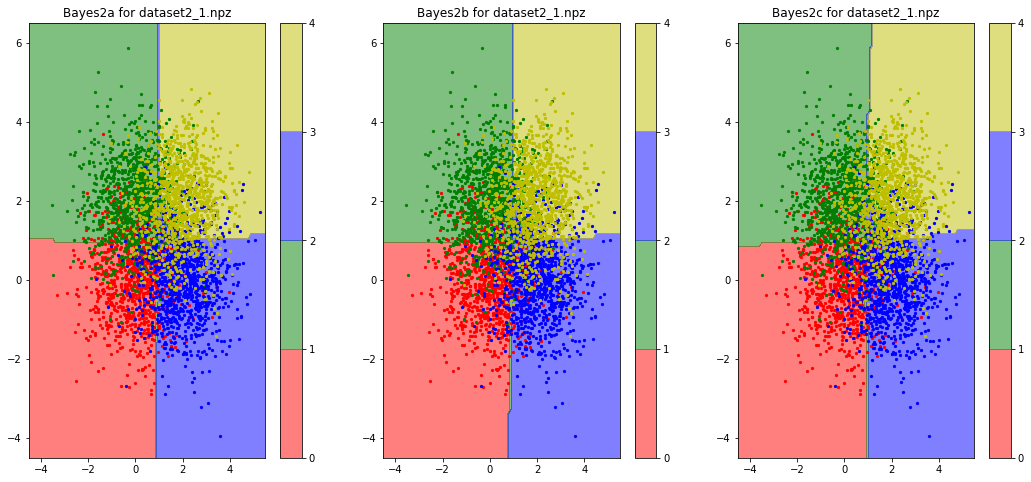

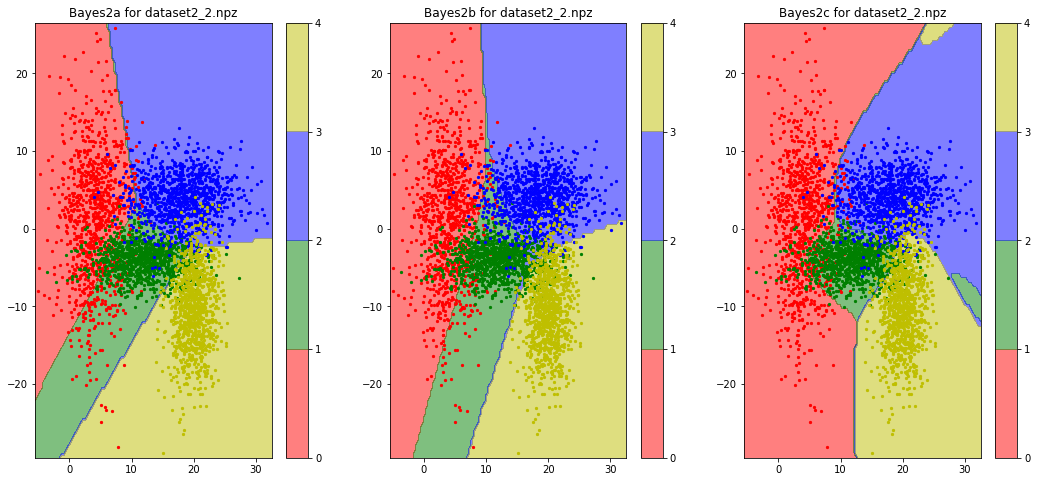

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
data_names = ['dataset2_1.npz','dataset2_2.npz']
#d_s_1=np.load('dataset1_1.npz')
#d_s_2=np.load('dataset1_2.npz')
#d_s_3=np.load('dataset1_3.npz')
for data_set in data_names :
    d_s_2   = np.load(data_set)
    X_train = d_s_2['arr_0']
    Y_train = d_s_2['arr_1']
    X_test  = d_s_2['arr_2']
    Y_test  = d_s_2['arr_3']
    
    X_train_1 = np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i]==1])
    X_train_2 = np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i]==2])
    X_train_3 = np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i]==3])
    X_train_4 = np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i]==4])
    
    # limits for plotting
    max_0   = round(np.max(X_train[:,0]))+0.5
    min_0   = round(np.min(X_train[:,0]))-0.5
    lim_0  = np.linspace(min_0,max_0,100)
    max_1   = round(np.max(X_train[:,1]))+0.5
    min_1   = round(np.min(X_train[:,1]))-0.5
    lim_1  = np.linspace(min_1,max_1,100)
    X_test_1,X_test_2 = np.meshgrid(lim_0,lim_1)

    Y_test_gr_a = np.zeros(X_test_1.shape)
    Y_test_gr_b = np.zeros(X_test_1.shape)
    Y_test_gr_c = np.zeros(X_test_1.shape)


    for i in range(Y_test_gr_a.shape[0]):
        X_test_gr = np.concatenate((X_test_1[i,:],X_test_2[i,:]))
        X_test_gr = X_test_gr.reshape(2,Y_test_gr_a.shape[0])
        X_test_gr = np.transpose(X_test_gr)
        Y_test_gr_a[i,:] = Bayes2a(X_train,Y_train,X_test_gr)
        Y_test_gr_b[i,:] = Bayes2b(X_train,Y_train,X_test_gr)
        Y_test_gr_c[i,:] = Bayes2c(X_train,Y_train,X_test_gr)

        # print(X_test_gr)
    
    plt.figure(figsize=(18,8))
    
    plt.subplot(1,3,1)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_a,levels =np.arange(0,5),colors = ('r','g','b','y'),alpha =0.5)
    plt.title('Bayes2a '+'for '+ str(data_set))
    plt.scatter(X_train_1[:,0],X_train_1[:,1],color = 'r',s = 5)
    plt.scatter(X_train_2[:,0],X_train_2[:,1],color = 'g', s = 5)
    plt.scatter(X_train_3[:,0],X_train_3[:,1],color = 'b',s = 5)
    plt.scatter(X_train_4[:,0],X_train_4[:,1],color = 'y', s = 5)
    plt.colorbar(d)
    
    plt.subplot(1,3,2)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_b,levels =np.arange(0,5),colors = ('r','g','b','y'),alpha =0.5)
    plt.scatter(X_train_1[:,0],X_train_1[:,1],color = 'r',s = 5)
    plt.scatter(X_train_2[:,0],X_train_2[:,1],color = 'g', s = 5)
    plt.scatter(X_train_3[:,0],X_train_3[:,1],color = 'b',s = 5)
    plt.scatter(X_train_4[:,0],X_train_4[:,1],color = 'y', s = 5)
    plt.title('Bayes2b '+'for '+ str(data_set))
    plt.colorbar(d)
    
    plt.subplot(1,3,3)
    d = plt.contourf(X_test_1,X_test_2,Y_test_gr_c,levels =np.arange(0,5),colors = ('r','g','b','y'),alpha =0.5)
    plt.scatter(X_train_1[:,0],X_train_1[:,1],color = 'r',s = 5)
    plt.scatter(X_train_2[:,0],X_train_2[:,1],color = 'g', s = 5)
    plt.scatter(X_train_3[:,0],X_train_3[:,1],color = 'b',s = 5)
    plt.scatter(X_train_4[:,0],X_train_4[:,1],color = 'y', s = 5)
    plt.title('Bayes2c '+'for '+ str(data_set))
    plt.colorbar(d)



** Cell type : TextWrite ** 
(Write your observations and table of errors here)
## Observations 

From the plots it is evident, that :

1) Bayes2c is working better for both the data sets

2) If the data is distributed as Normal with unknown mean $\mu_a$ and known variance $I$ the Bayes2a works fine.

3) If the data is distributed as Normal with unknown mean $\mu_a$ and unknown variance $\Sigma$ the Bayes2a works fine.

4) If no extra information is given regarding the data, it's better to use Bayes2c classifier.

## Expected Loss

| Expected Loss | Bayes2a | Bayes2b | Bayes2c |
|---------------|:-------:|--------:|---------|
| Data Set 1    |  0.4297 |  0.429  | 0.4277  |
| Data Set 2    |  0.1835 |  0.1895 | 0.1407  |


## Confusion Matrices 

##### Bayes2a for Data Set 1
| Confusion Table | Predicted 1 | Predicted 2 | Predicted 3 | Predicted 4 |
|-----------------|:-----------:|------------:|-------------|-------------|
| Actual 1        |     633     |     219     |     136     |      12     |
| Actual 2        |      97     |     738     |      62     |     103     |
| Actual 3        |      86     |      49     |     770     |      95     |
| Actual 4        |      15     |     136     |     194     |     655     |     

   ##### Bayes2b for Data Set 1
| Confusion Table | Predicted 1 | Predicted 2 | Predicted 3 | Predicted 4 |
|-----------------|:-----------:|------------:|-------------|-------------|
| Actual 1        |     633     |     218     |     137     |      12     |
| Actual 2        |      95     |     743     |      60     |     102     |
| Actual 3        |      84     |      49     |     773     |      94     |
| Actual 4        |      16     |     137     |     196     |     651     |

   ##### Bayes2c for Data Set 1
| Confusion Table | Predicted 1 | Predicted 2 | Predicted 3 | Predicted 4 |
|-----------------|:-----------:|------------:|-------------|-------------|
| Actual 1        |     634     |     217     |     138     |      11     |
| Actual 2        |      99     |     742     |      61     |      98     |
| Actual 3        |      87     |      47     |     772     |      94     |
| Actual 4        |      15     |     134     |     201     |     650     |
   
   ##### Bayes2a for Data Set 2
| Confusion Table | Predicted 1 | Predicted 2 | Predicted 3 | Predicted 4 |
|-----------------|:-----------:|------------:|-------------|-------------|
| Actual 1        |     830     |     150     |      18     |      2      |
| Actual 2        |      93     |     784     |      46     |      77     |
| Actual 3        |      30     |      61     |     905     |      4      |
| Actual 4        |      0      |      23     |      78     |     899     |

   ##### Bayes2b for Data Set 2
| Confusion Table | Predicted 1 | Predicted 2 | Predicted 3 | Predicted 4 |
|-----------------|:-----------:|------------:|-------------|-------------|
| Actual 1        |     891     |     106     |      3      |      0      |
| Actual 2        |     119     |     691     |     124     |      66     |
| Actual 3        |      23     |     106     |     864     |      7      |
| Actual 4        |      0      |      5      |     102     |     893     |

   ##### Bayes2c for Data Set 2
| Confusion Table | Predicted 1 | Predicted 2 | Predicted 3 | Predicted 4 |
|-----------------|:-----------:|------------:|-------------|-------------|
| Actual 1        |     901     |      80     |      19     |      0      |
| Actual 2        |      64     |     824     |      46     |      66     |
| Actual 3        |      19     |      31     |     936     |      14     |
| Actual 4        |      0      |      36     |      48     |     916     |


**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{m} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Repeat for 100 times, and estimate the bias and variance for all 15 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms (corresponding to 5 degrees and 6 lambda values) analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. 

3b) In the next text cell, give the Bias and Variance computed as a $5\times 6$ matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




Degree= 1 lambda= 1e-09
Bias = 0.055185890875
Variance = 0.00443448233355
MSE = 0.0596203732086
Degree= 1 lambda= 1e-07
Bias = 0.0555053890508
Variance = 0.003677567796
MSE = 0.0591829568468
Degree= 1 lambda= 1e-05
Bias = 0.0552936448085
Variance = 0.00389529051365
MSE = 0.0591889353221
Degree= 1 lambda= 0.001
Bias = 0.0551664638962
Variance = 0.00423201659771
MSE = 0.0593984804939
Degree= 1 lambda= 0.1
Bias = 0.0555393857225
Variance = 0.00288117880934
MSE = 0.0584205645318
Degree= 1 lambda= 10.0
Bias = 0.252484513869
Variance = 7.20891231306e-05
MSE = 0.252556602992
Degree= 2 lambda= 1e-09
Bias = 0.0349262461074
Variance = 0.00580365639538
MSE = 0.0407299025027
Degree= 2 lambda= 1e-07
Bias = 0.0348781618158
Variance = 0.00552640560048
MSE = 0.0404045674163
Degree= 2 lambda= 1e-05
Bias = 0.0349529501167
Variance = 0.00607085257247
MSE = 0.0410238026891
Degree= 2 lambda= 0.001
Bias = 0.0348101323575
Variance = 0.00547584112965
MSE = 0.0402859734871
Degree= 2 lambda= 0.1
Bias = 0.041124

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Degree= 8 lambda= 1e-05
Bias = 0.00508002773284
Variance = 0.0364574346702
MSE = 0.0415374624031
Degree= 8 lambda= 0.001
Bias = 0.0100292019072
Variance = 0.0111050845567
MSE = 0.0211342864639
Degree= 8 lambda= 0.1
Bias = 0.0282926929652
Variance = 0.00339229963073
MSE = 0.0316849925959
Degree= 8 lambda= 10.0
Bias = 0.239280674249
Variance = 0.00016373147075
MSE = 0.239444405719
Degree= 16 lambda= 1e-09
Bias = 0.0272945142383
Variance = 0.457270457914
MSE = 0.484564972152
Degree= 16 lambda= 1e-07
Bias = 0.0155944077044
Variance = 0.224888527078
MSE = 0.240482934782
Degree= 16 lambda= 1e-05
Bias = 0.00693083861527
Variance = 0.072880047218
MSE = 0.0798108858333
Degree= 16 lambda= 0.001
Bias = 0.0103839836088
Variance = 0.0192642935249
MSE = 0.0296482771337
Degree= 16 lambda= 0.1
Bias = 0.0262927051161
Variance = 0.00364015048129
MSE = 0.0299328555973
Degree= 16 lambda= 10.0
Bias = 0.239034106663
Variance = 0.00014349754785
MSE = 0.239177604211


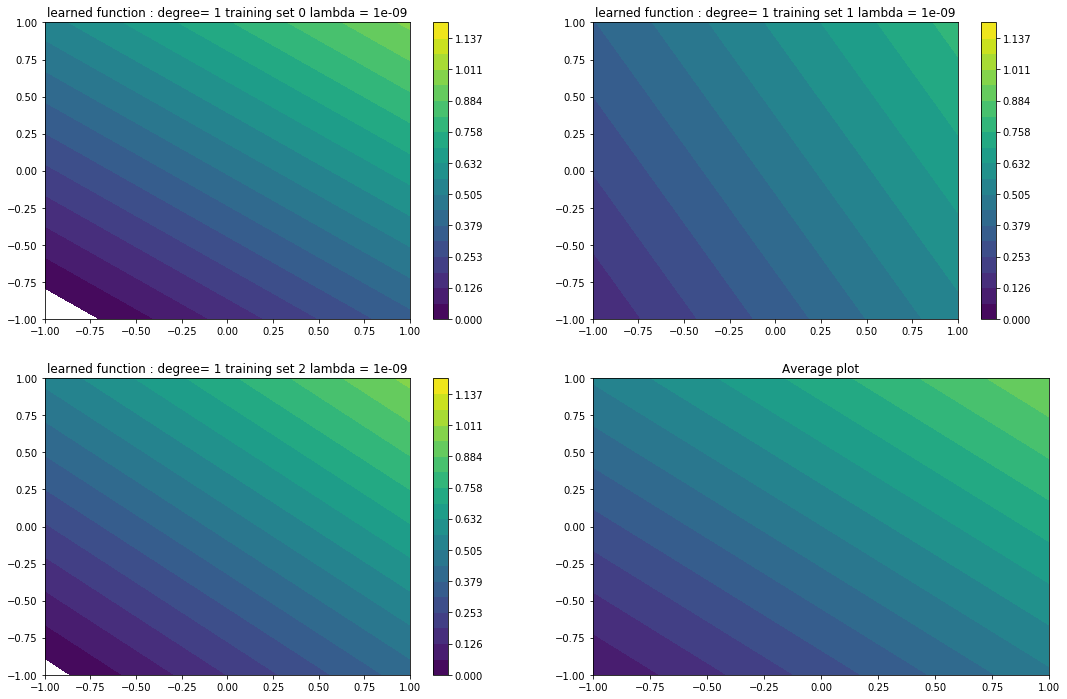

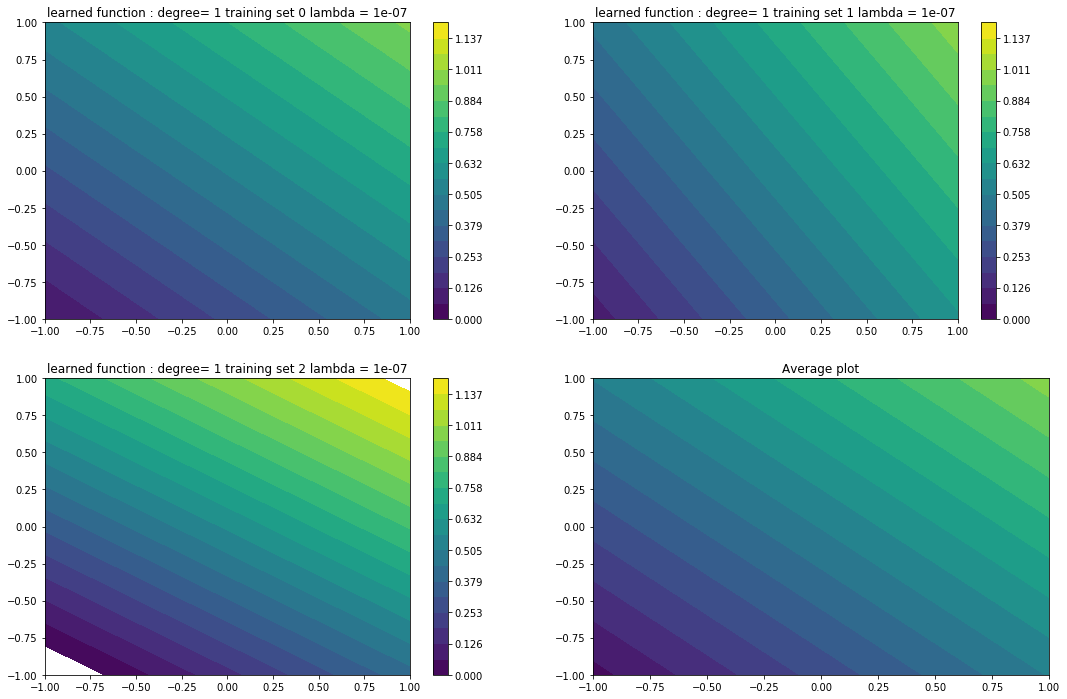

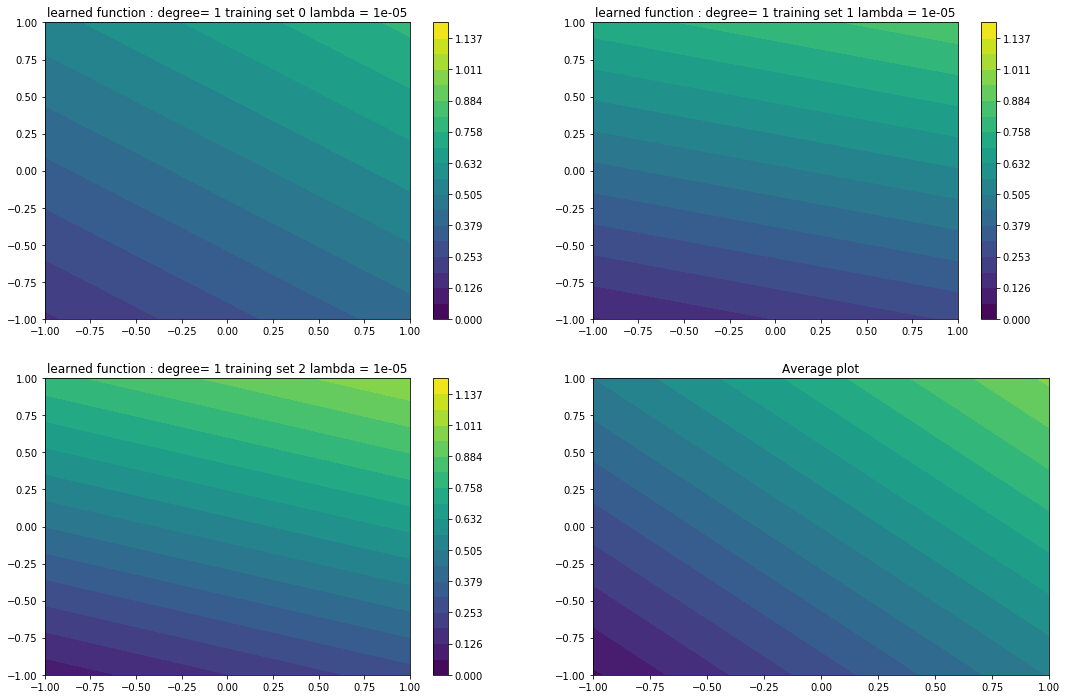

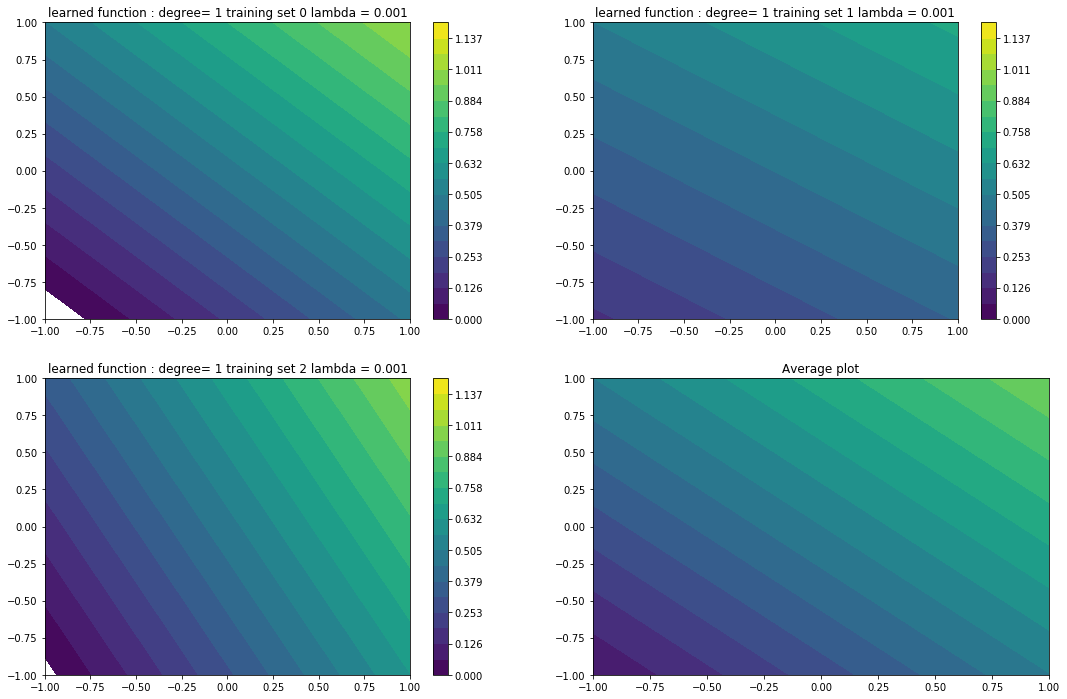

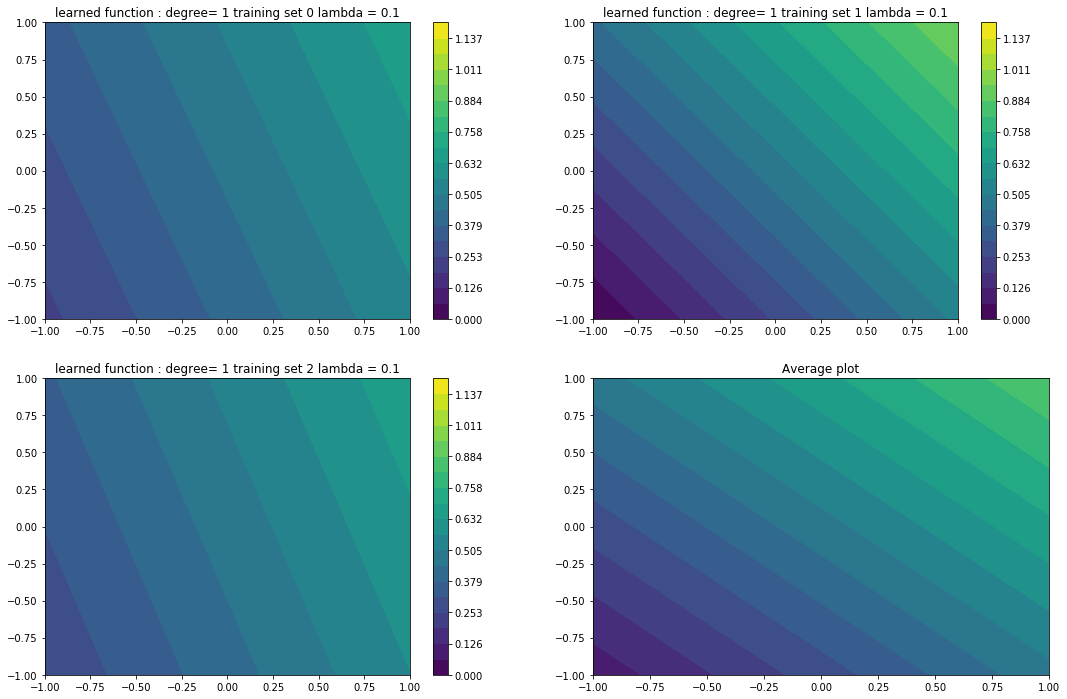

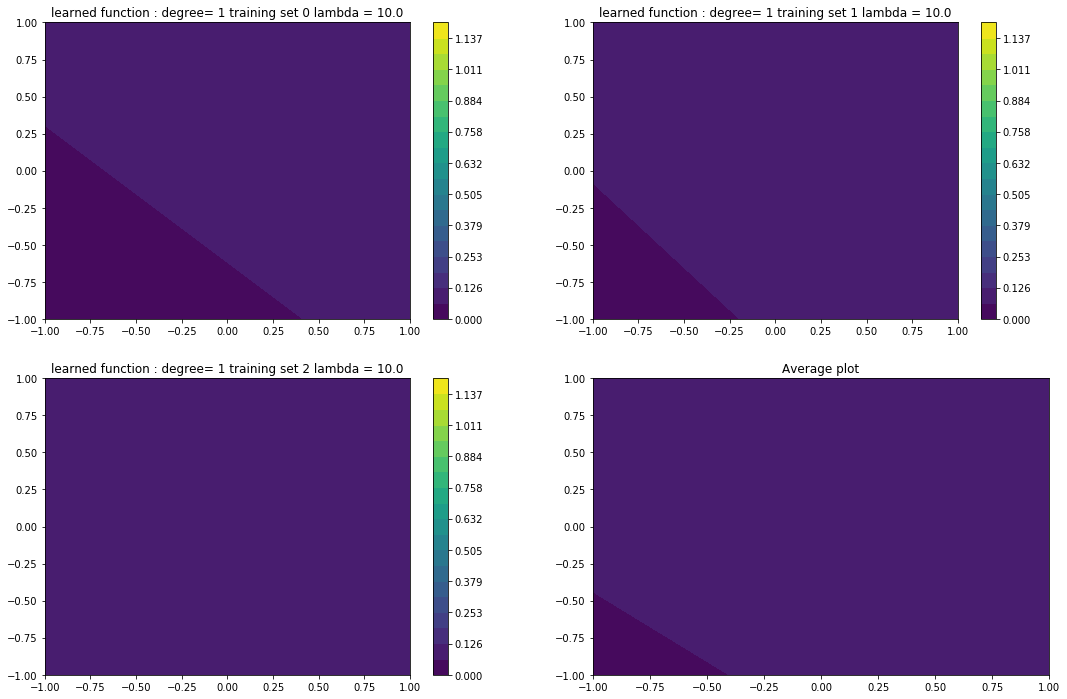

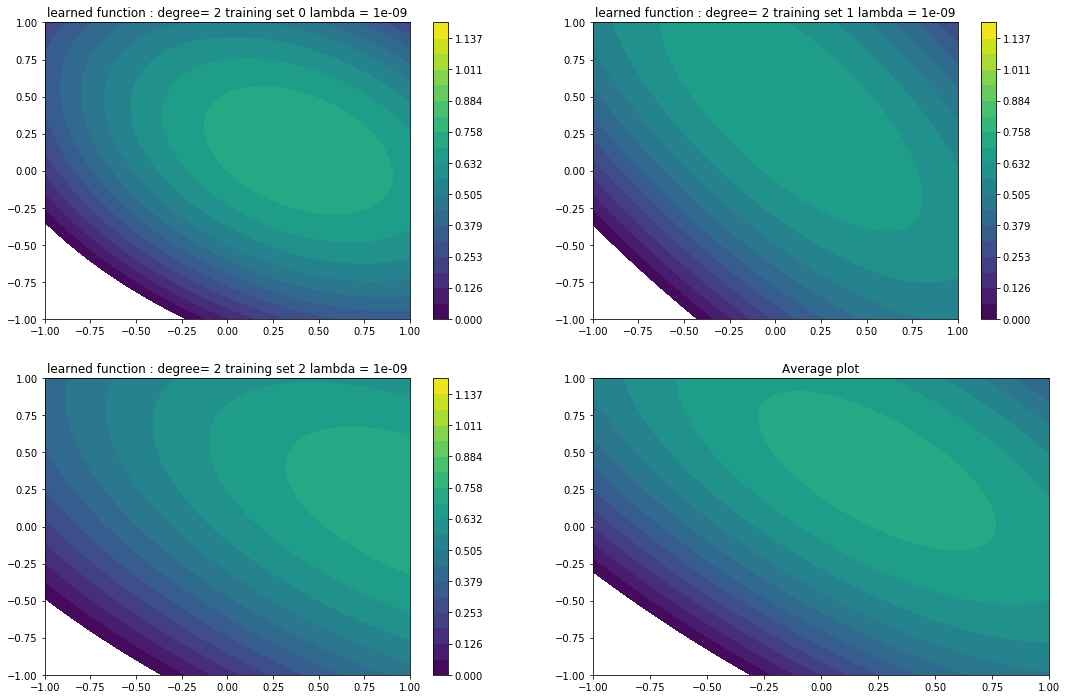

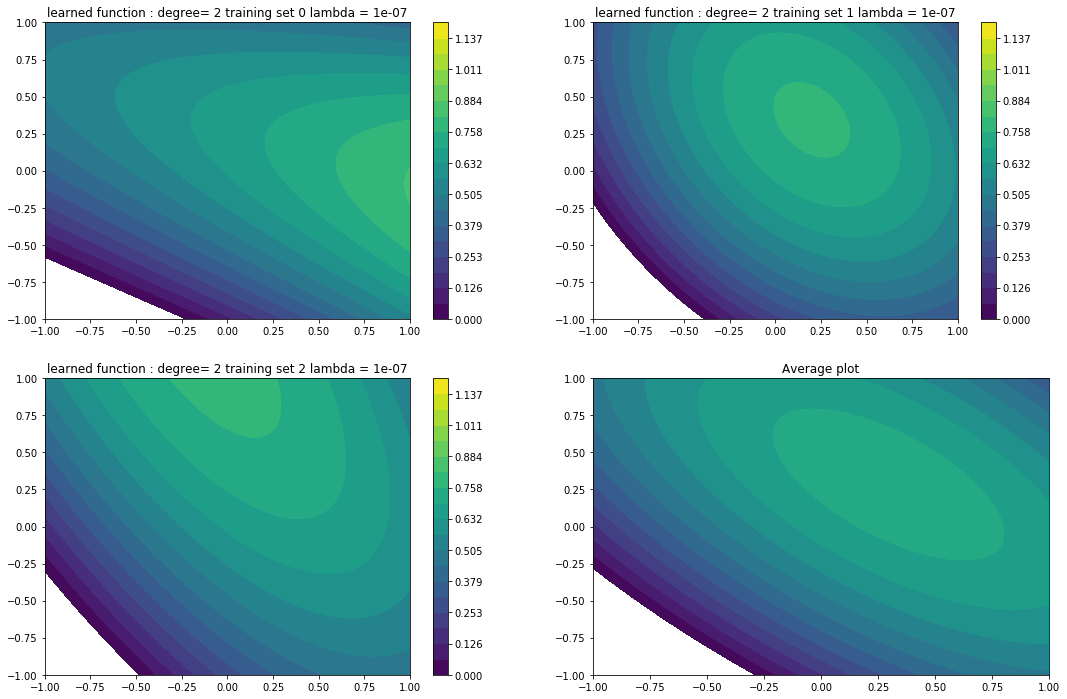

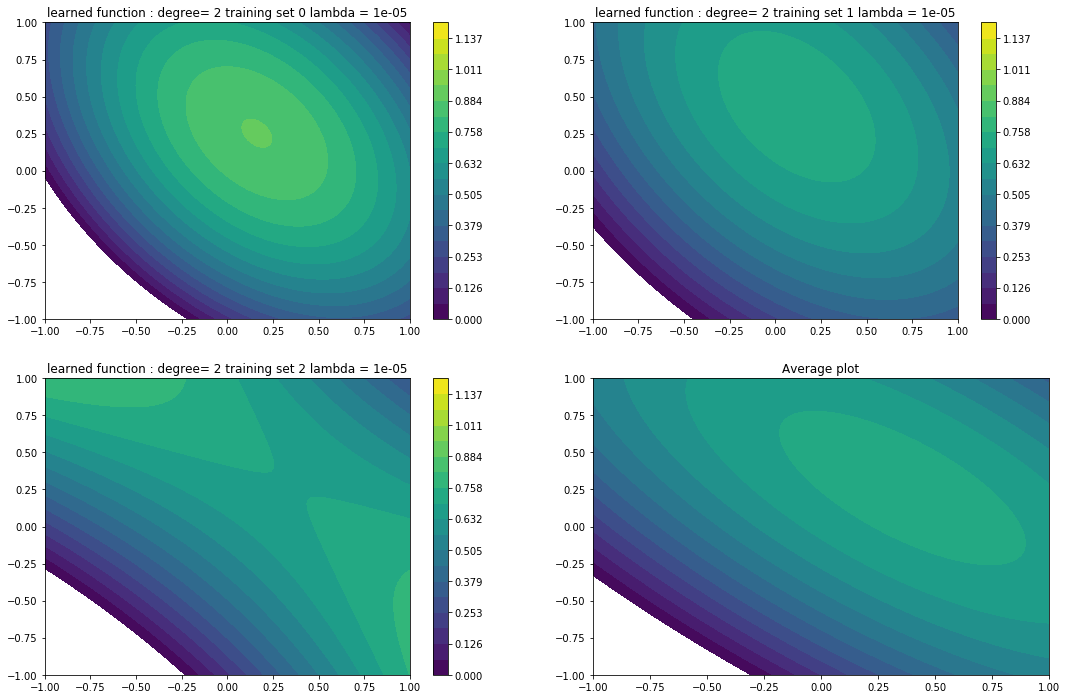

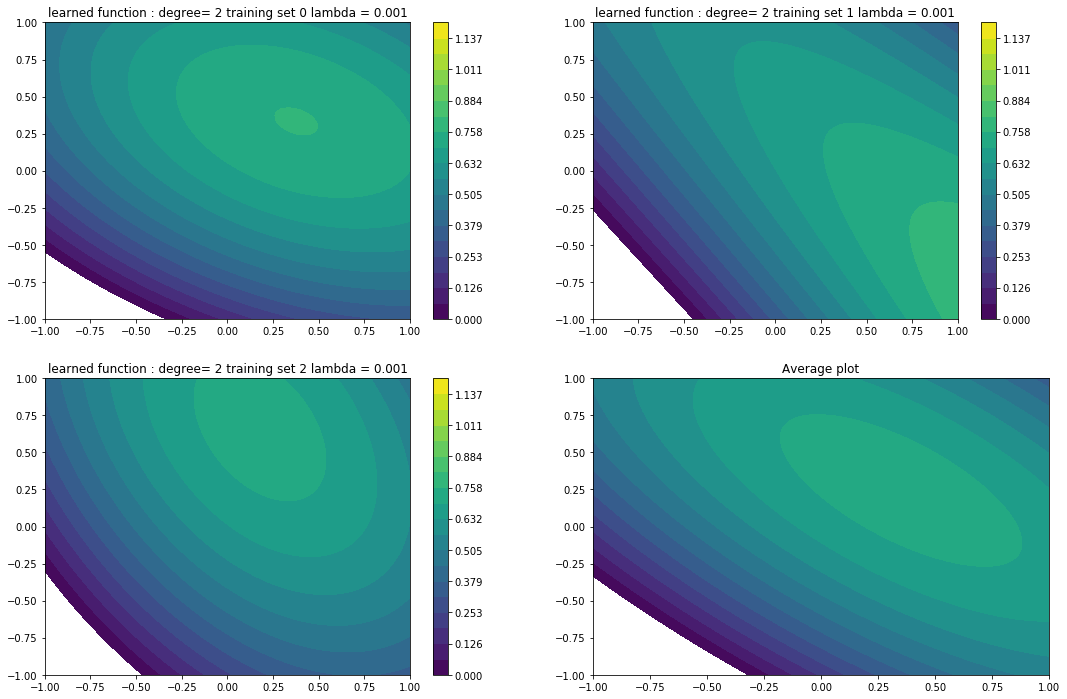

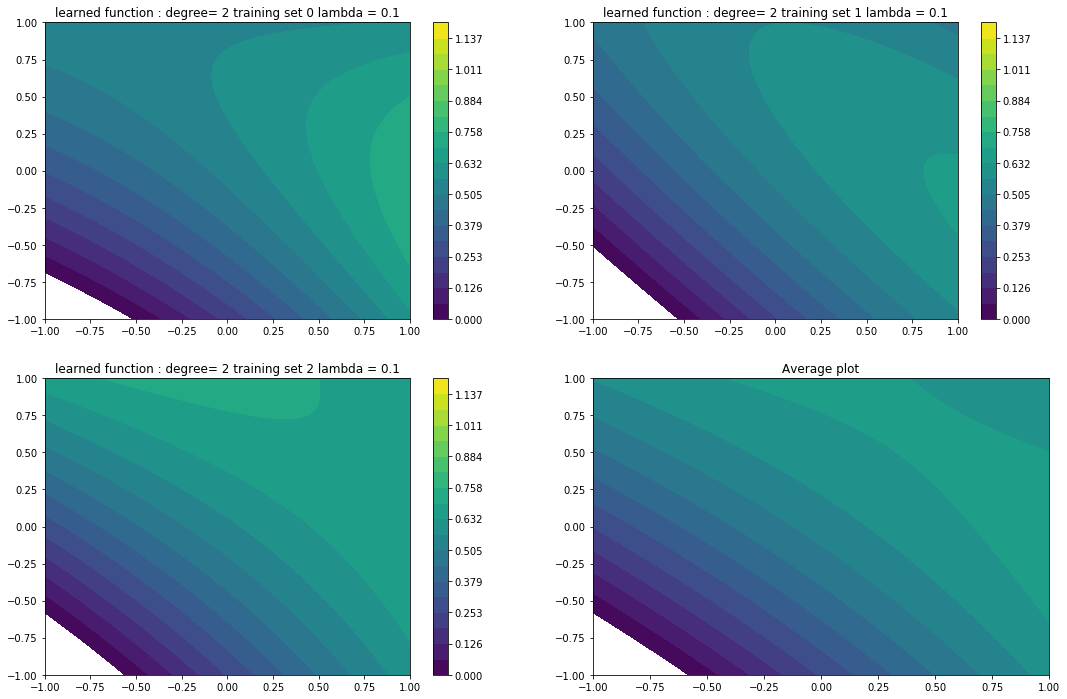

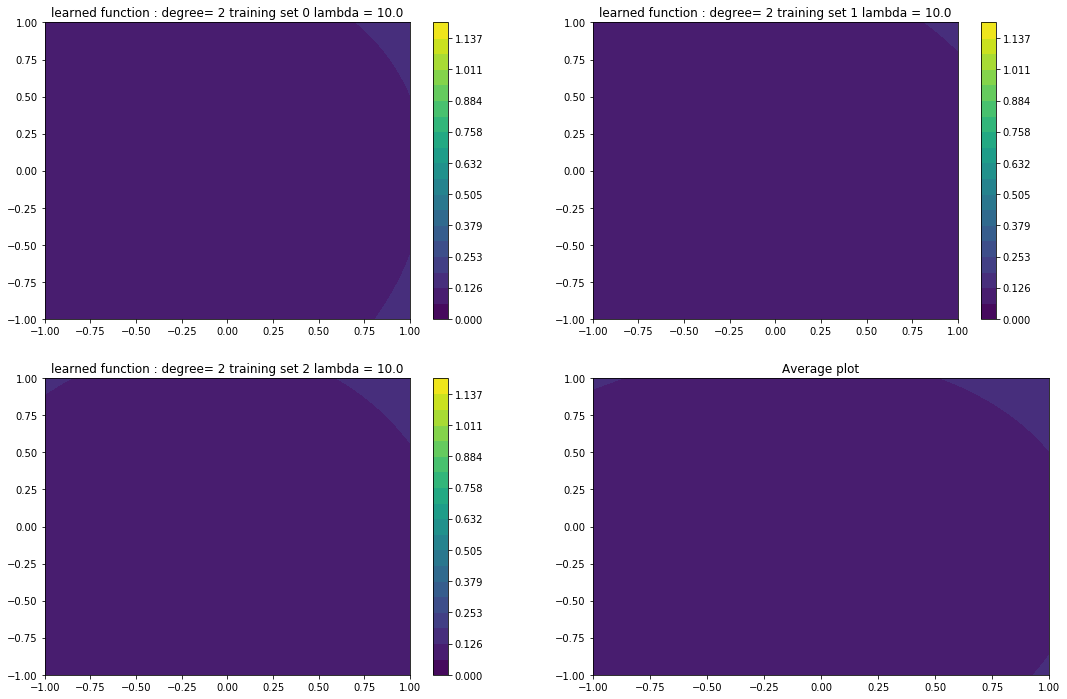

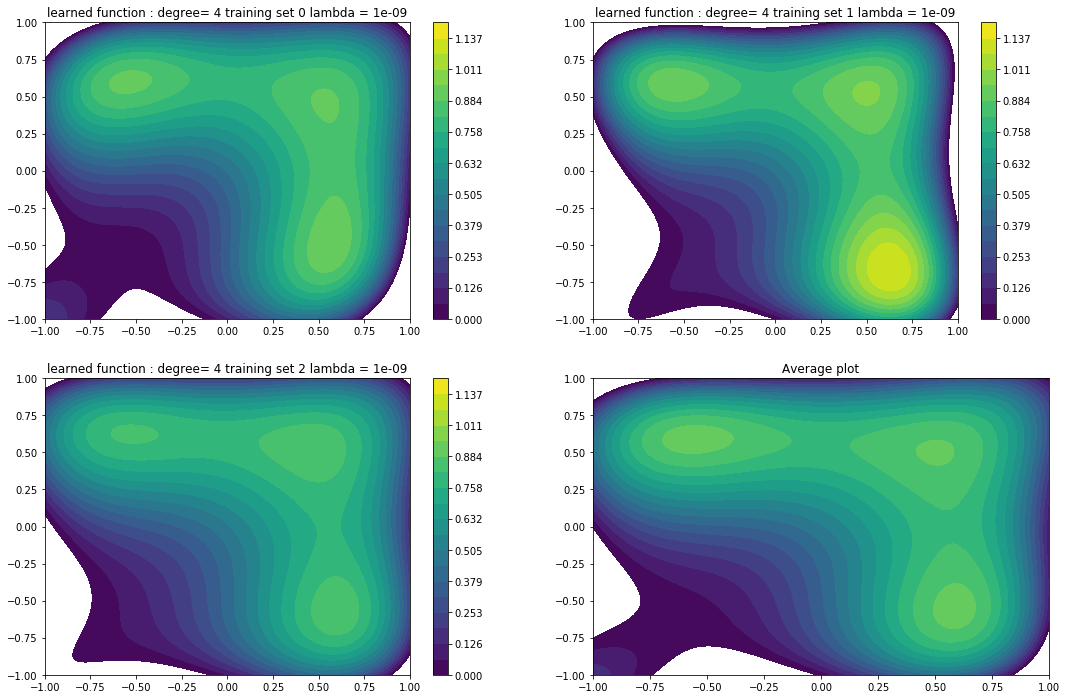

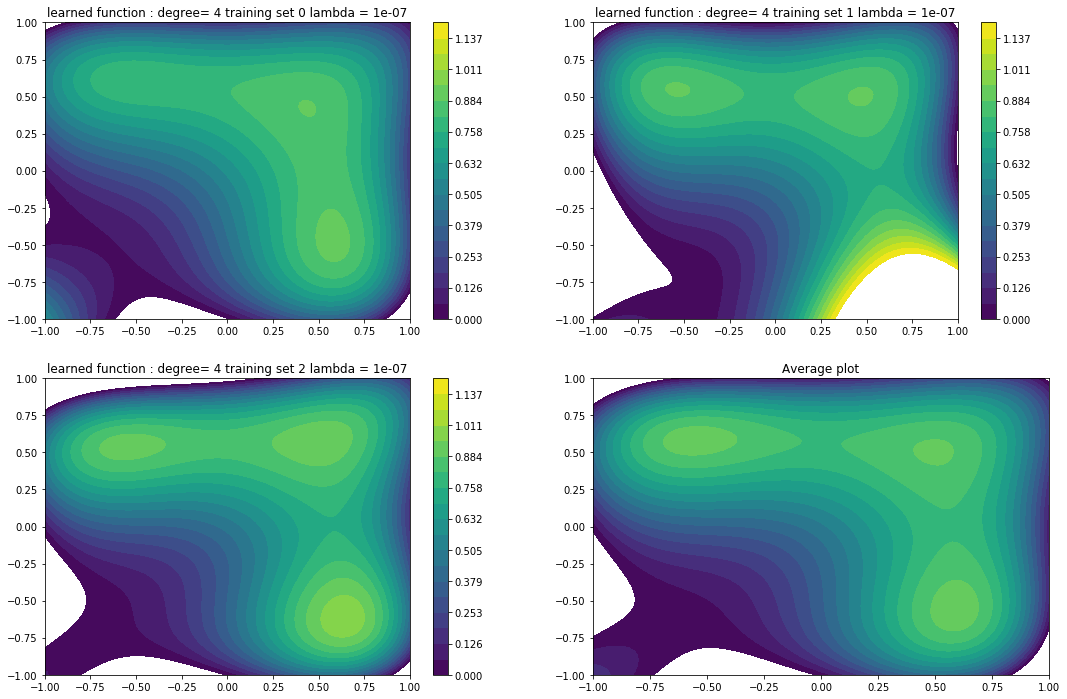

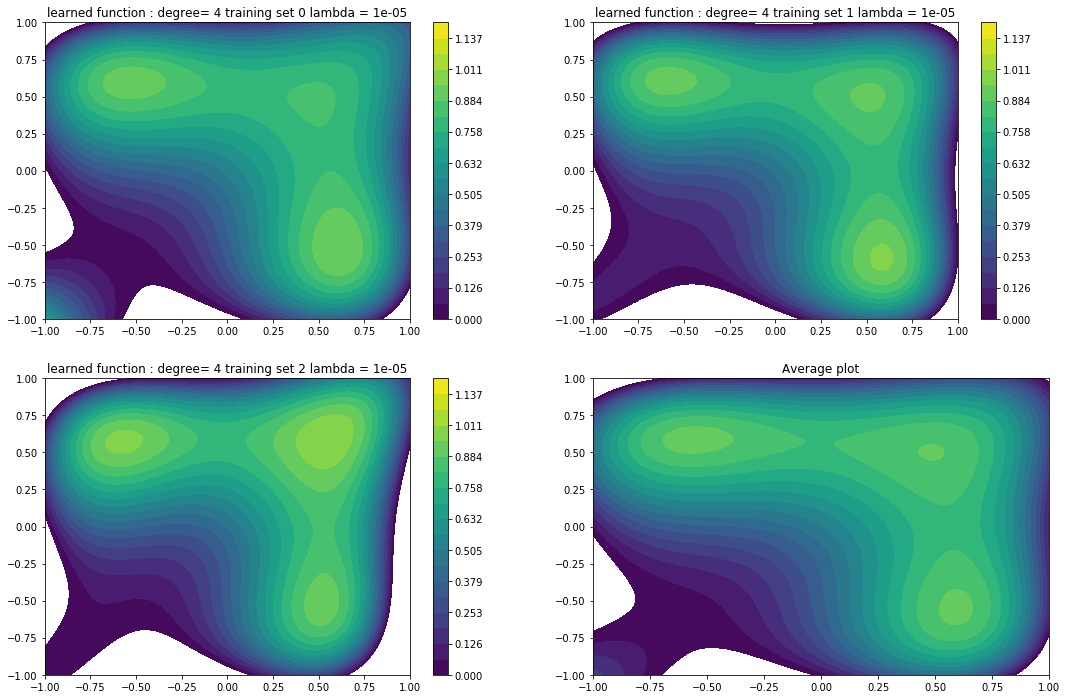

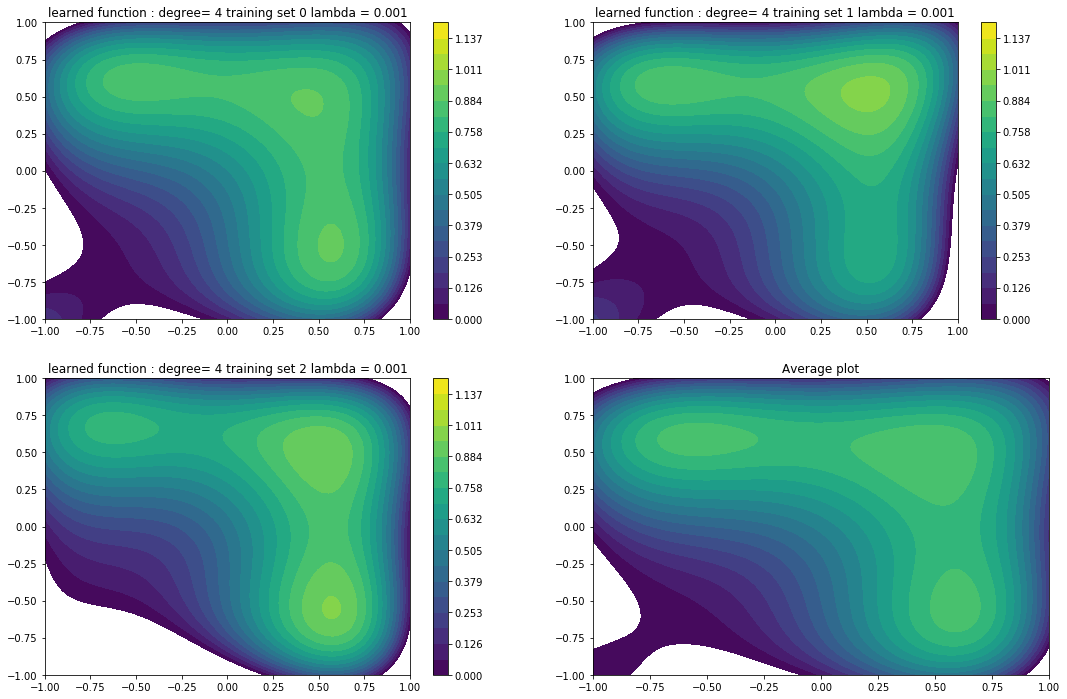

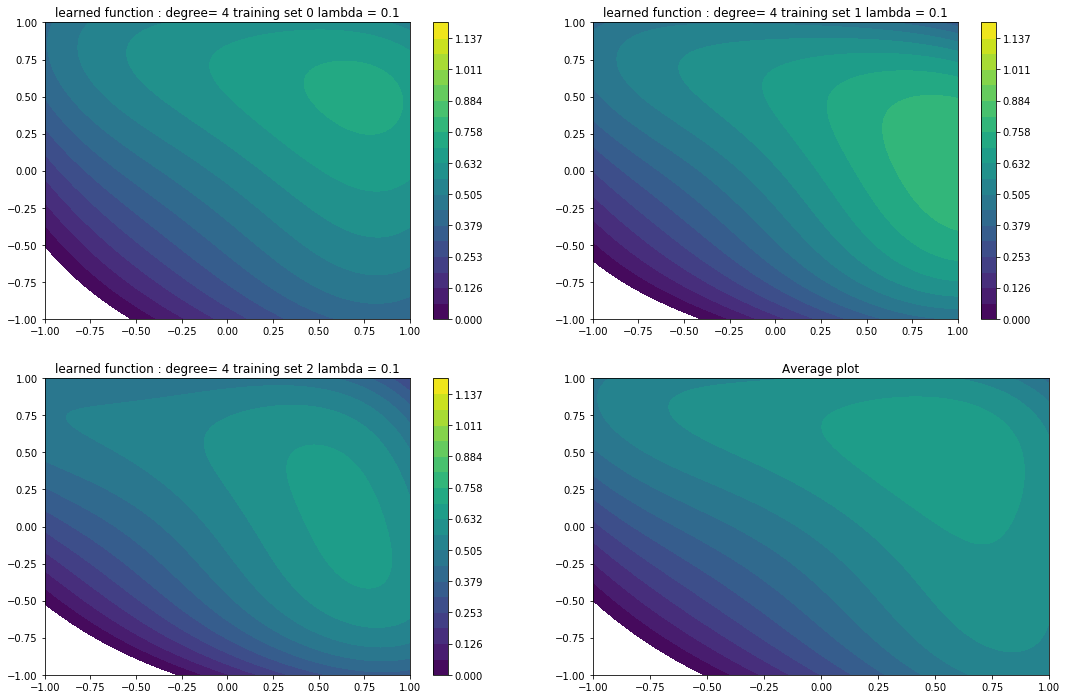

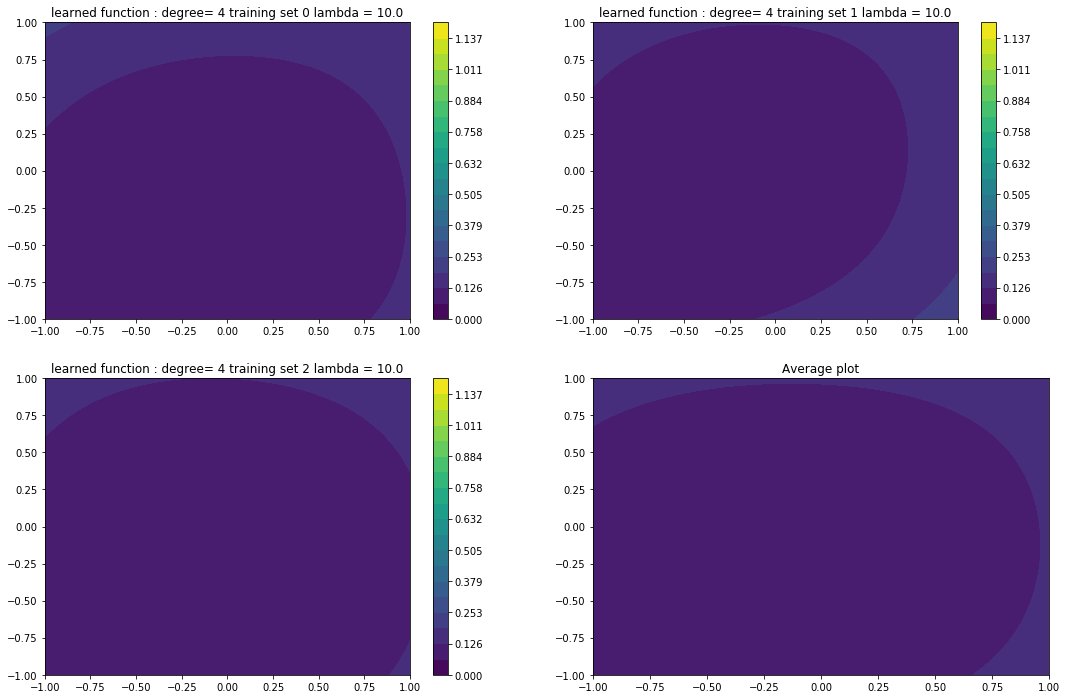

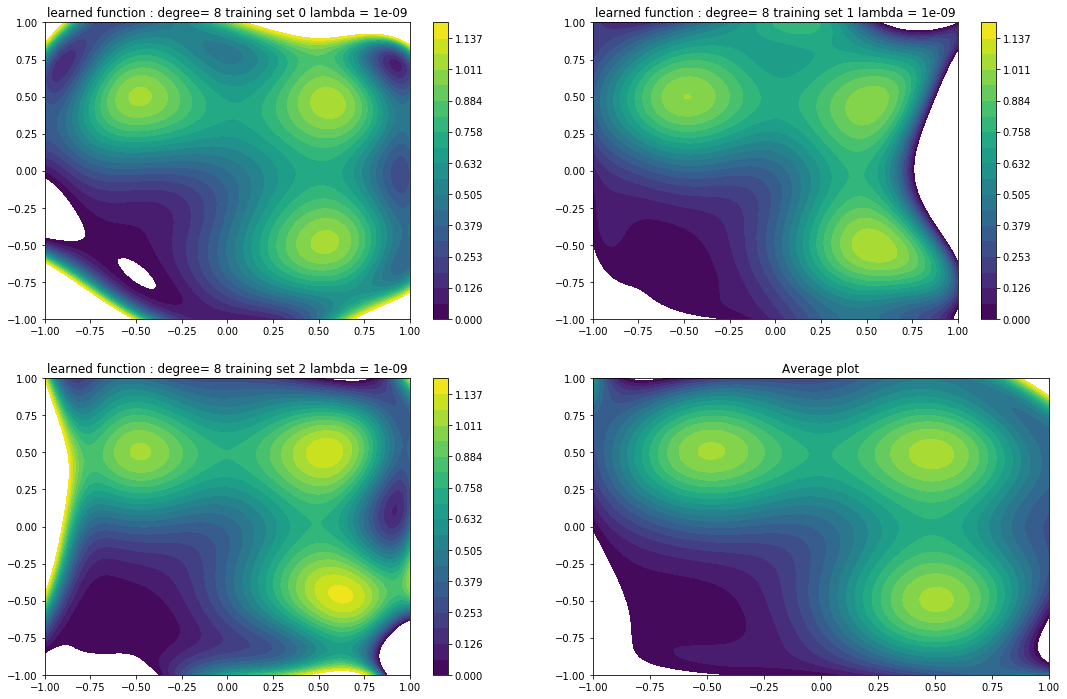

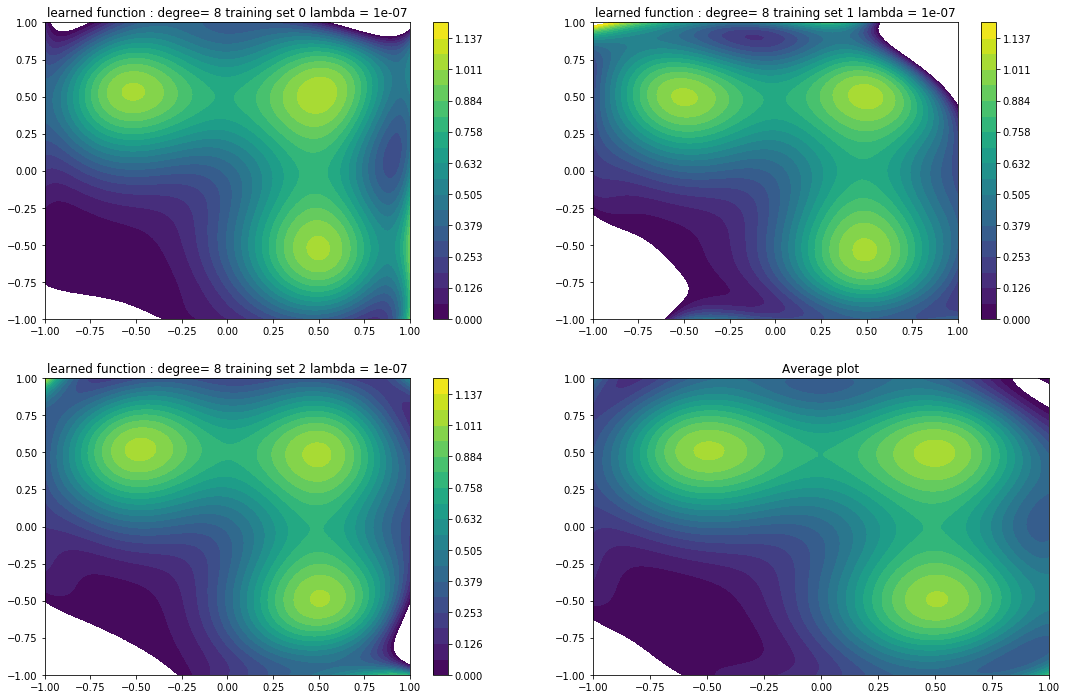

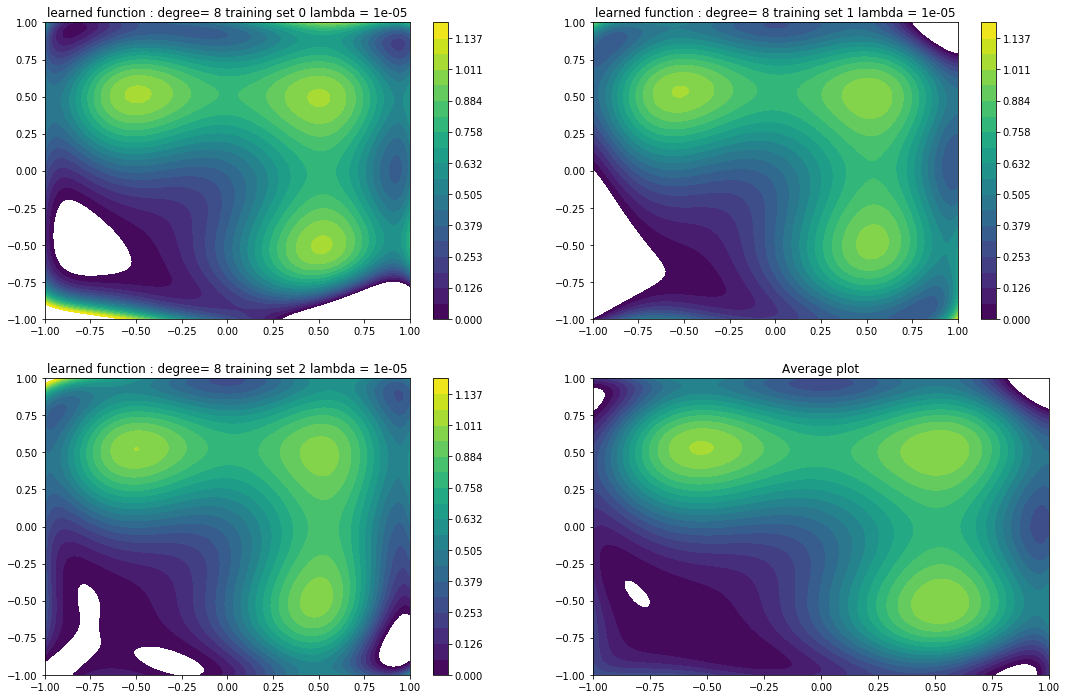

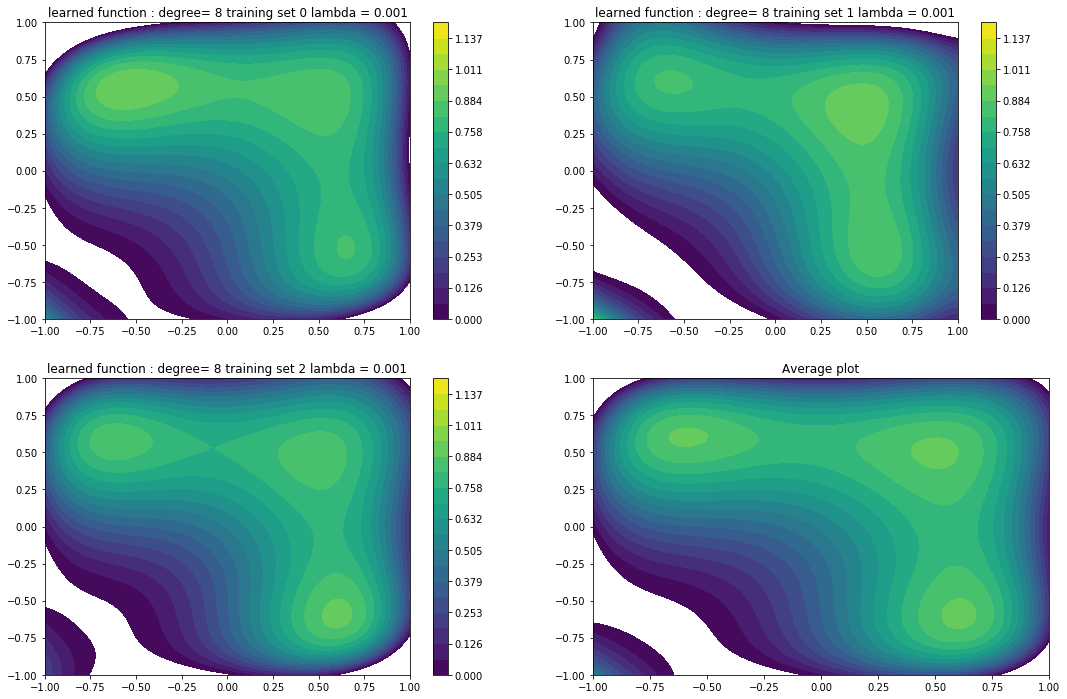

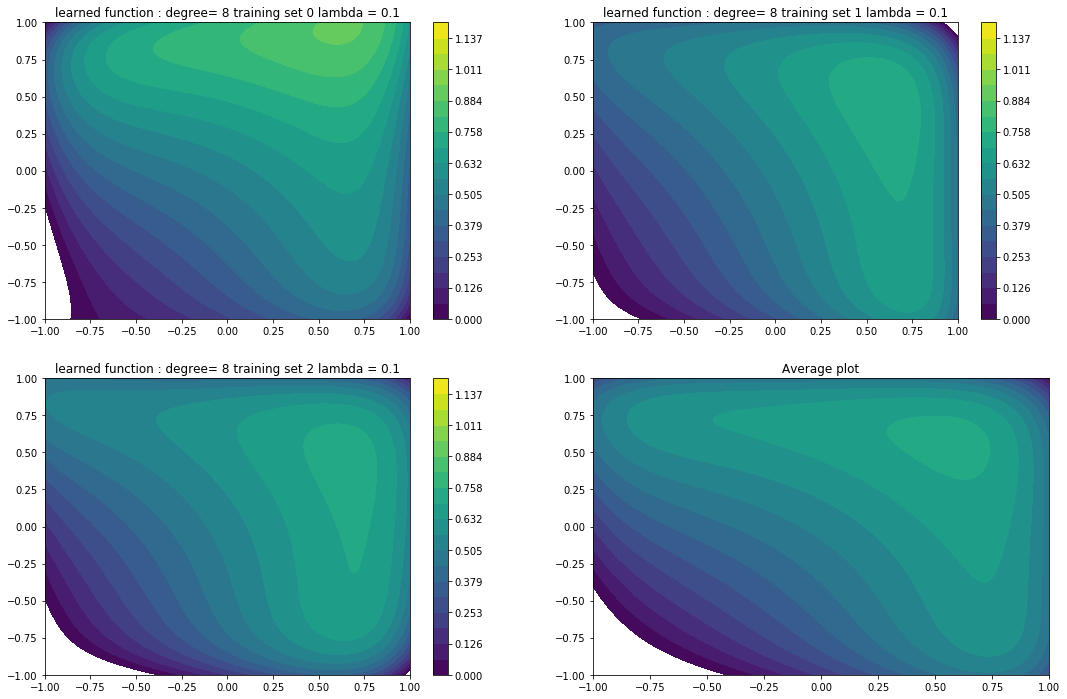

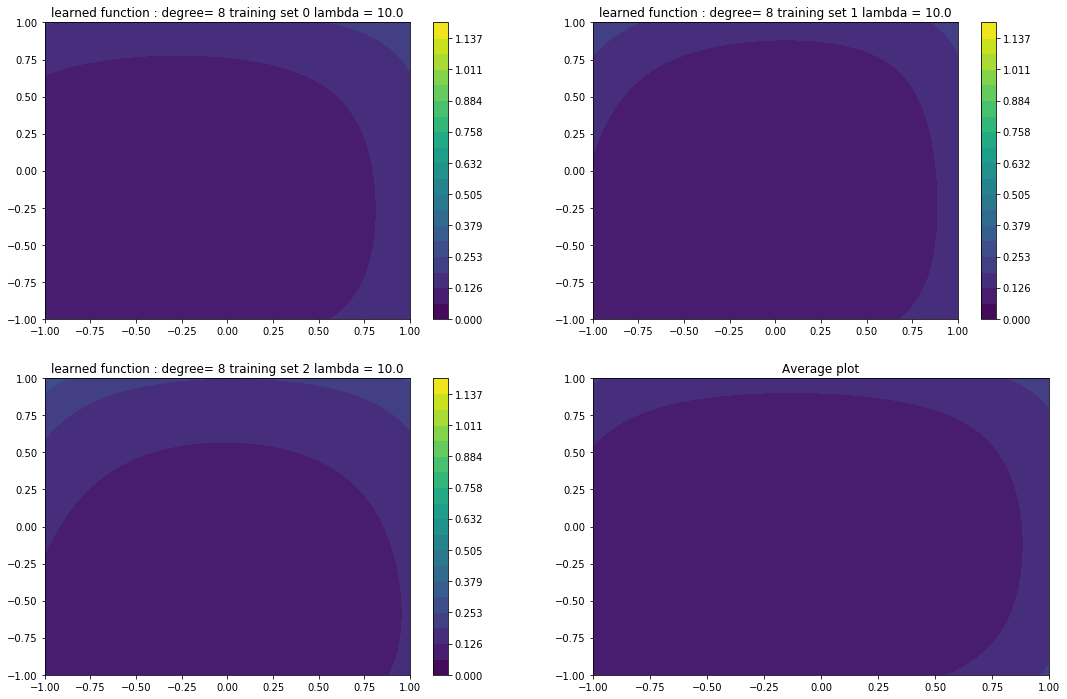

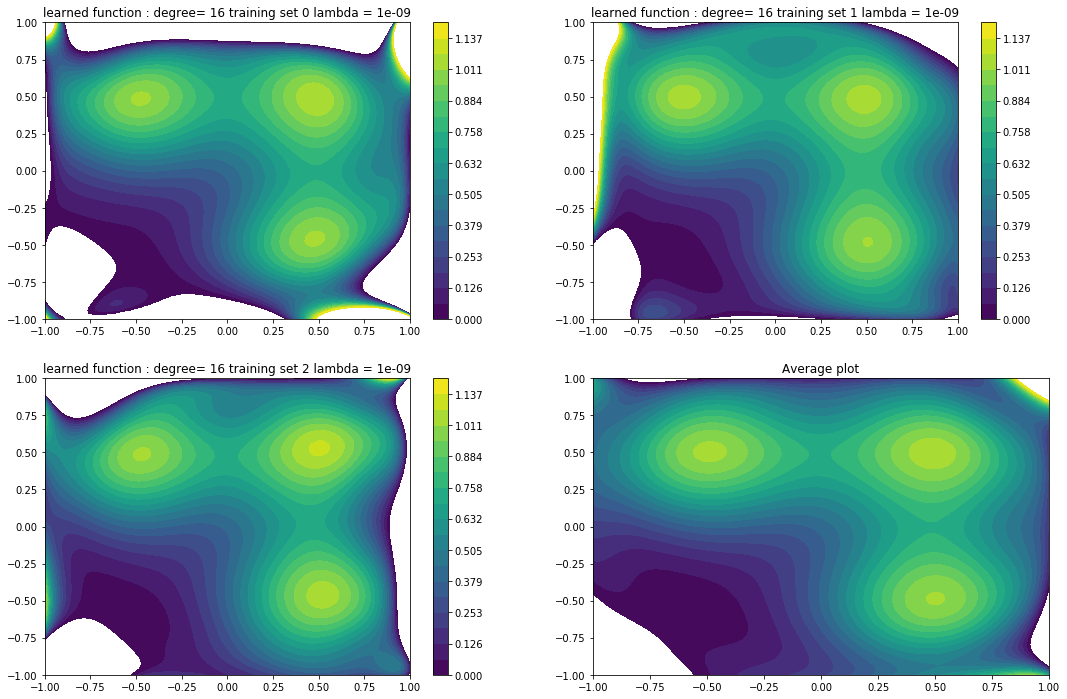

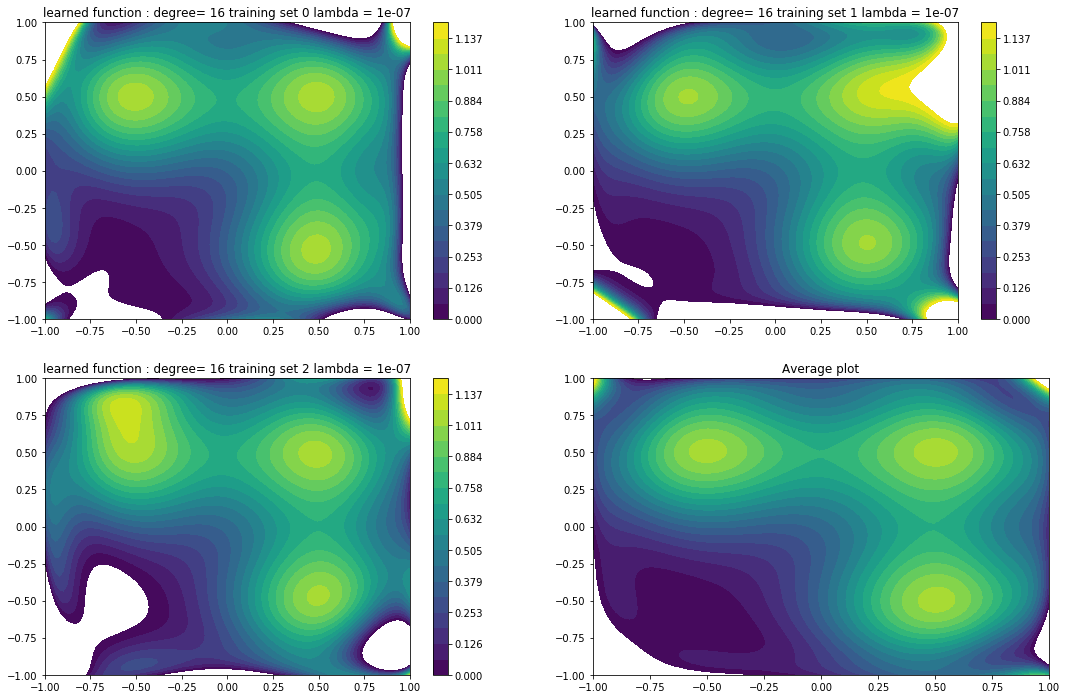

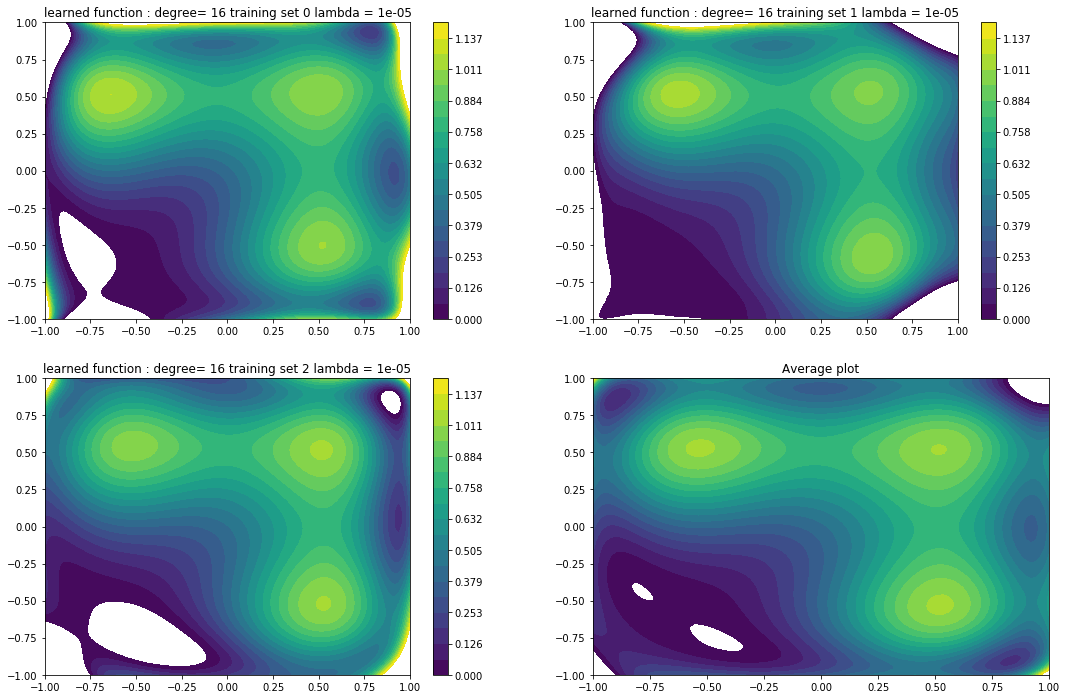

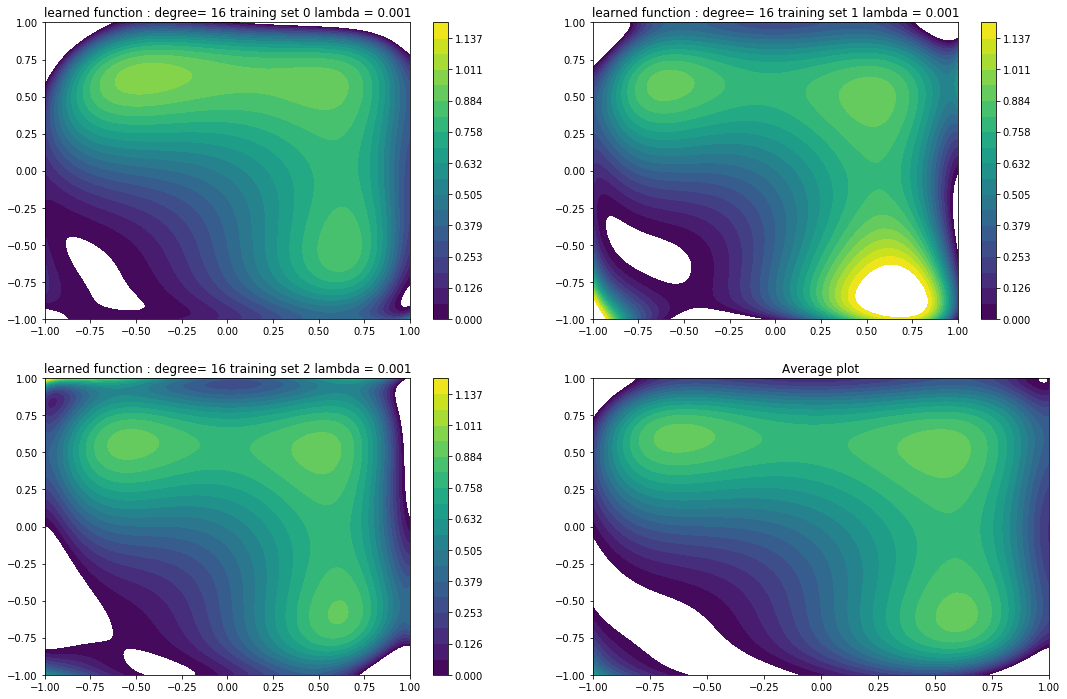

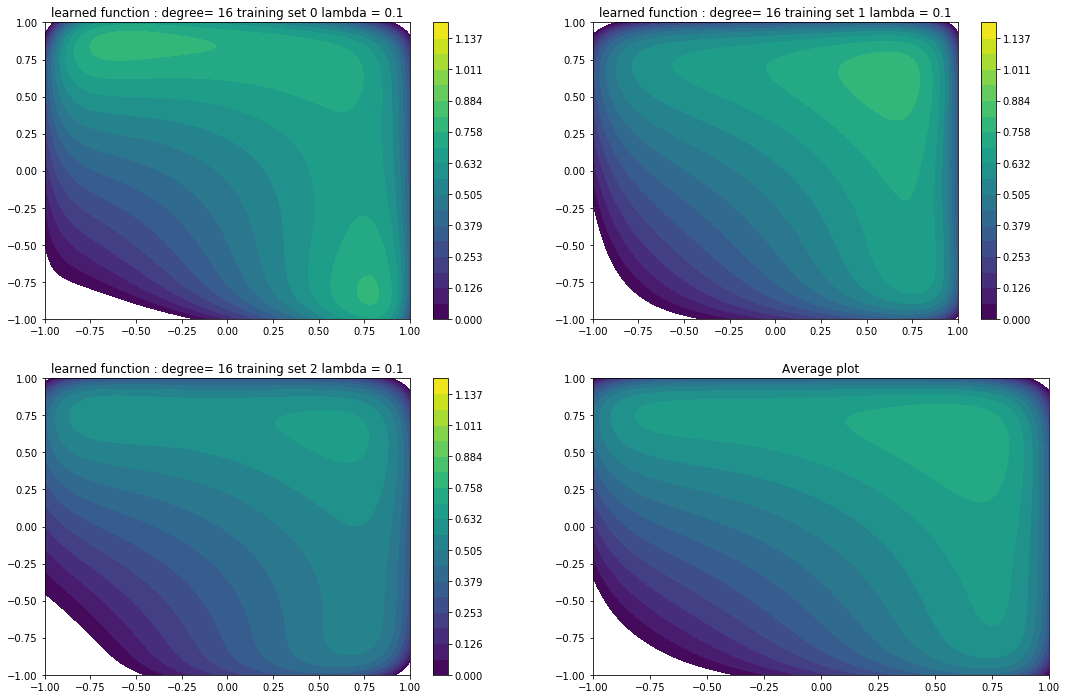

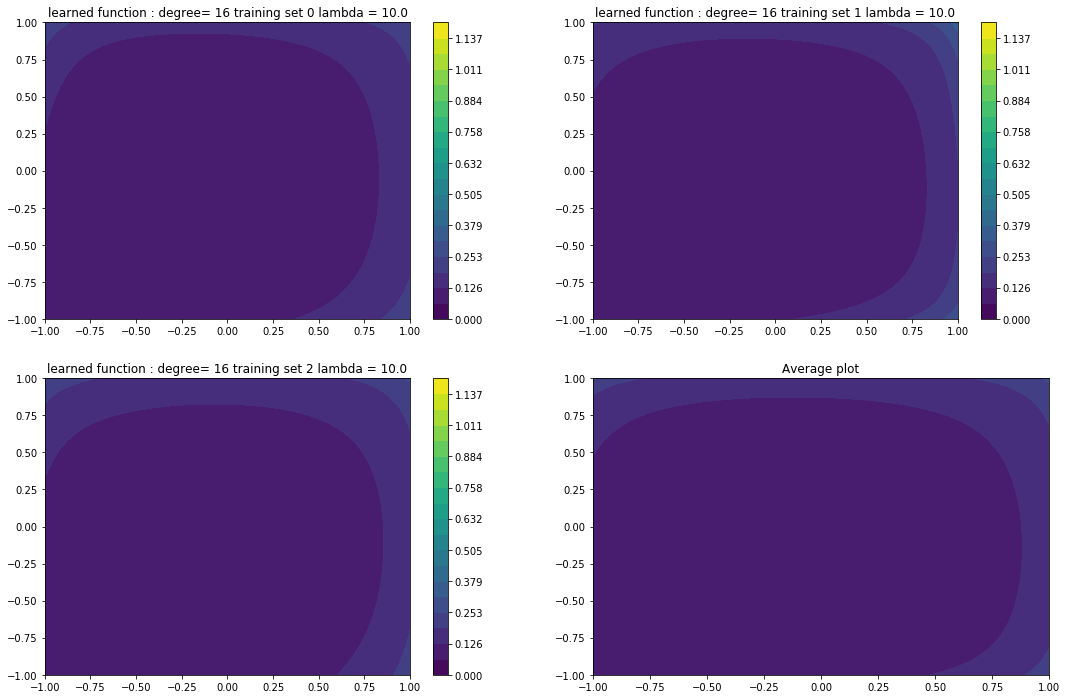

In [8]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    # considering X_test to be a 2 dimensional data
    x1 =X_test[:,0]
    x2 =X_test[:,1]
    features = np.ones((X_test.shape[0],1))
    for k in range(1,degree+1):
        for j in range(0,k+1):
            features = np.concatenate((features,np.multiply(x1[:,None]**(k-j),x2[:,None]**j)),axis=1)
    #print(features)
    y_test_pred = np.dot(features,wt_vector)
    
    return(y_test_pred)
    

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):

    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        X_test = np.concatenate((X[i],Y[i]),axis=0)
        X_test = X_test.reshape(2,100)
        X_test = np.transpose(X_test)
        Z[i] = polynomial_regression_ridge_pred(X_test,wt_vector,degree)
        
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    plt.title('learned function : degree= '+ str(degree) + title)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    # no. of sample points
    m = X_train.shape[0]
    lamda = reg_param
    
    x1 =X_train[:,0]
    x2 =X_train[:,1]
    phi = np.ones((m,1))
    
    for k in range(1,degree+1):
        for j in range(0,k+1):
            phi = np.concatenate((phi,np.multiply(x1[:,None]**(k-j),x2[:,None]**j)),axis=1)
    
    # W_hat = (phi_transpose*phi + m*lamda*I/2)^(-1)*phi_transpose*y
    #       = term1^(-1)*term2
    
    term1 = np.dot(np.transpose(phi),phi)+m*lamda/2*np.identity(phi.shape[1])
    term2 = np.dot(np.transpose(phi),Y_train)
    W_hat = np.dot(np.linalg.inv(term1),term2)
    
    return(W_hat)

    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    # number of runs
    num_runs = 100    
    a = np.array([0.5,0.5])
    b = np.array([-0.5,0.5])
    c = np.array([0.5,-0.5])
    
    X_test = np.zeros((10000,2))
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    
    # The entire data of X
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            X_test[i*Y.shape[0]+j]=np.array([X[i,j],Y[i,j]])
            
    # Actual function as a function of X
    f_star = np.exp(-4*np.linalg.norm(X_test-a,axis=1)**2)+np.exp(-4*np.linalg.norm(X_test-b,axis=1)**2)+np.exp(-4*np.linalg.norm(X_test-c,axis=1)**2)
    # storing all run values
    f_s = np.zeros((num_runs,len(f_star)))
    
    for i in range(num_runs):
    # generating iid data
        X_train = np.random.uniform(-1,1,(num_training_samples,2))
        Y_train = np.exp(-4*np.linalg.norm(X_train-a,axis=1)**2)+np.exp(-4*np.linalg.norm(X_train-b,axis=1)**2)+np.exp(-4*np.linalg.norm(X_train-c,axis=1)**2)
        # fitting polynomial for given degree and given lambda
        wt_vector = polynomial_regression_ridge_train(X_train,Y_train,degree,reg_param)
        if(i<3):
            plt.subplot(2,2,i+1)
            title = " training set " + str(i)+ " lambda = "+str(reg_param)
            visualise_polynomial_2d(wt_vector, degree, title)

        f_s[i] = polynomial_regression_ridge_pred(X_test, wt_vector, degree)
    
    g = np.mean(f_s,axis = 0)  
    var = np.mean((f_s-g)**2)
    bias = np.mean((f_star-g)**2)
    mse = np.mean((f_s-f_star)**2)
    
    plt.subplot(2,2,4)
    Z = g.reshape(X.shape)
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    plt.title("Average plot")

    return(bias,var,mse)
        
for degree in [1,2,4,8,16]:
    for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
        plt.figure(figsize=(18,12))
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        

In [9]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

# Bias matrix


| degree\lambda | 1e-9             | 1e-7             | 1e-5             | 1e-3             | 1e-1            | 1e1            |
|---------------|------------------|------------------|------------------|------------------|-----------------|----------------|
| 1             | 0.0552500975699  | 0.0552603972882  | 0.0552099219706  | 0.0551262687569  | 0.0557150978974 | 0.252879426219 |
| 2             | 0.0348663039325  | 0.0347348127913  | 0.0346659457143  | 0.0346525278603  | 0.0411460890584 | 0.24471270822  |
| 4             | 0.00822263344105 | 0.00844730589477 | 0.00824464427195 | 0.00670982139506 | 0.0347735608187 | 0.240626445641 |
| 8             | 0.0104176523764  | 0.0029046705965  | 0.00389448678174 | 0.00924778523653 | 0.0286869335184 | 0.237140930506 |
| 16            | 0.0281775119768  | 0.0166926057481  | 0.0101549446598  | 0.0115937231153  | 0.0264692371502 | 0.23929982912  |

# Variance matrix

| degree\lambda | 1e-9             | 1e-7             | 1e-5             | 1e-3             | 1e-1             | 1e1               |
|---------------|------------------|------------------|------------------|------------------|------------------|-------------------|
| 1             | 0.00377413629529 | 0.00345895959886 | 0.0037273573484  | 0.00367978363486 | 0.0023094675575  | 7.62701636636e-05 |
| 2             | 0.00613900060196 | 0.00538950831119 | 0.0052946259912  | 0.00569853808209 | 0.00316997342671 | 9.44042557707e-05 |
| 4             | 0.00924501537285 | 0.00840560240422 | 0.00905629357008 | 0.00445977637045 | 0.00335363820028 | 0.000102564821585 |
| 8             | 0.631684310874   | 0.0449169000657  | 0.0205923858187  | 0.0107256484007  | 0.0039260070876  | 0.000145818002577 |
| 16            | 0.443415342747   | 0.26904146458    | 0.0764510452153  | 0.0182554964208  | 0.00414071748229 | 0.000148406339157 |


# Observations :

-  In general, Bias decreases with increase in degree of the training polynomial used

-  In general, Variance increases with increase in degree of the training polynomial used

-  variance decreases as the $\lambda$ value increases, this can be thought of as giving more prior weight to our assumption

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using three different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{m} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

In the next codewrite cell, for each training set size compute how the train and test squared error varies with degree and regularisation parameter. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title including the hyperparameters. Total number of figures = 4 (one for each training set size.)

Summarise your findings in the next tex cell in a few sentences. And reproduce the tables showing train and test error for various training sizes, with appropriate row and column names.




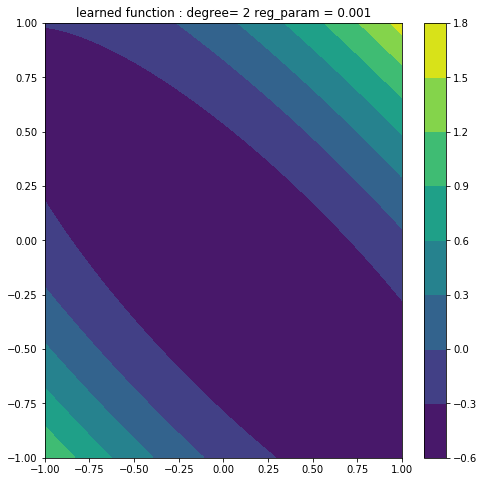

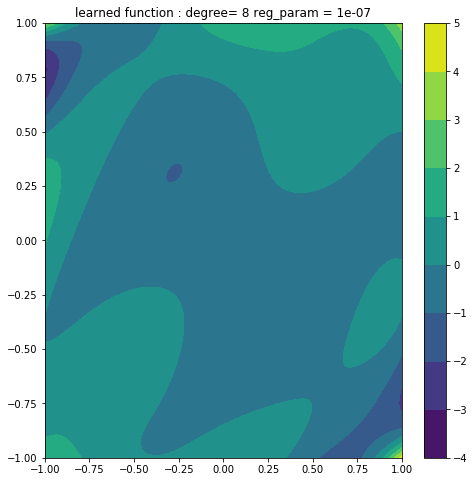

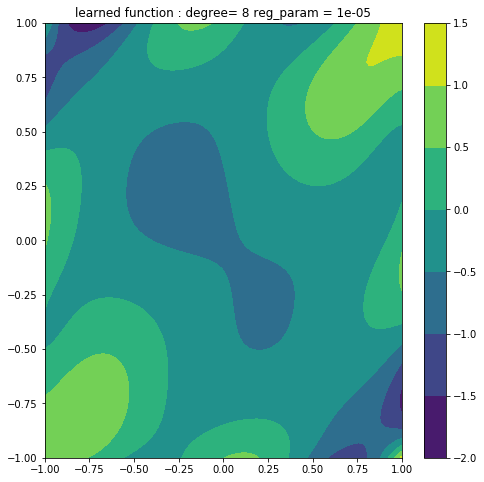

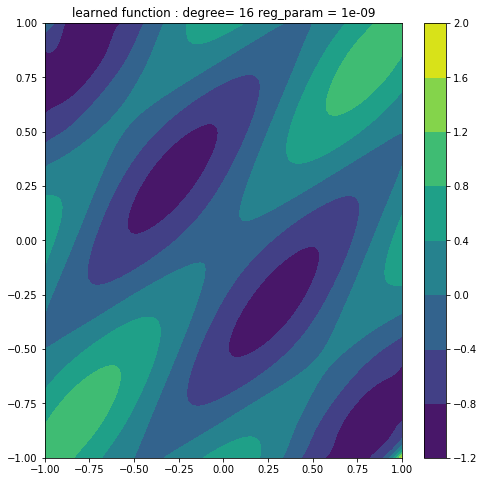

In [10]:
# Cell type : CodeWrite 
def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    # considering X_test to be a 2 dimensional data
    x1 =X_test[:,0]
    x2 =X_test[:,1]
    features = np.ones((X_test.shape[0],1))
    for k in range(1,degree+1):
        for j in range(0,k+1):
            features = np.concatenate((features,np.multiply(x1[:,None]**(k-j),x2[:,None]**j)),axis=1)
    #print(features)
    y_test_pred = np.dot(features,wt_vector)
    
    return(y_test_pred)

def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    # no. of sample points
    m = X_train.shape[0]
    lamda = reg_param
    
    x1 =X_train[:,0]
    x2 =X_train[:,1]
    phi = np.ones((m,1))
    
    for k in range(1,degree+1):
        for j in range(0,k+1):
            phi = np.concatenate((phi,np.multiply(x1[:,None]**(k-j),x2[:,None]**j)),axis=1)
    
    # W_hat = (phi_transpose*phi + m*lamda*I/2)^(-1)*phi_transpose*y
    #       = term1^(-1)*term2
    
    term1 = np.dot(np.transpose(phi),phi)+m*lamda/2*np.identity(phi.shape[1])
    term2 = np.dot(np.transpose(phi),Y_train)
    W_hat = np.dot(np.linalg.inv(term1),term2)
    return(W_hat)

def visualise_polynomial_2d(max_val,min_val,wt_vector, degree, title=""):

    X,Y = np.meshgrid(np.linspace(min_val,max_val,100), np.linspace(min_val,max_val,100))
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        X_test = np.concatenate((X[i],Y[i]),axis=0)
        X_test = X_test.reshape(2,100)
        X_test = np.transpose(X_test)
        Z[i] = polynomial_regression_ridge_pred(X_test,wt_vector,degree)
        
    plt.contourf(X,Y,Z)
    plt.title('learned function : degree= '+ str(degree) + title)
    plt.colorbar()
    
# Loading the data .
d_s=np.load('dataset4_1.npz')
X       = d_s['arr_0']
Y       = d_s['arr_1']
X_test  = d_s['arr_2']
Y_test  = d_s['arr_3']
#print(Y_test)
degrees = [1,2,4,8,16]
Lambda  = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]


max_val = np.max(X_test)
min_val = np.min(X_test)

for i in [50,100,200,1000] :
    X_train = X[0:i,:]
    Y_train = Y[0:i]

    d_hyp = degrees[0]
    l_hyp = Lambda[0]
    w_hat        = polynomial_regression_ridge_train(X_train, Y_train, d_hyp , l_hyp)
    Y_pred_test  = polynomial_regression_ridge_pred(X_test,w_hat,d_hyp)
    min_sq_er    = np.sum((Y_test-Y_pred_test)**2)

    for d in degrees :
        #print("degree = ",d)
        #print("===============================================")
        for l in Lambda :
            w_hat        = polynomial_regression_ridge_train(X_train, Y_train, d , l)
            Y_pred_test  = polynomial_regression_ridge_pred(X_test,w_hat,d)
            square_error = np.sum((Y_test-Y_pred_test)**2)
            #print(Y_pred_test)
            #print(square_error)
            if(min_sq_er > square_error):
                l_hyp = l
                d_hyp = d
                min_sq_er = square_error

    #print(l_hyp,d_hyp)

    plt.figure(figsize=(8,8))
    w_ls_hat = polynomial_regression_ridge_train(X_train, Y_train, d_hyp , l_hyp)
    visualise_polynomial_2d(max_val,min_val,w_ls_hat, d_hyp," reg_param = "+str(l_hyp))





** Cell type : TextWrite **
# Observations

1) For large training data, If we use a lesser degree polynomial for fitting the data, it would result in **under fitting**

2) For small training data If we use a higher degree polynomial for fitting the data, it would result in **over fitting** 

**As the size of training data increases, higher polynomial fits it the best.**

3) Increasing regularized parameter, increases the squared error, because we are giving more prior weight to our initial assumption.

# Error Tables

## for degree = 1 and $\lambda = 1e-9 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.247697354026 | 0.285127789474 |
| 100  | 0.262903519636 | 0.254858804847 |
| 200  | 0.257427415797 | 0.24873981429  |
| 1000 | 0.239369413951 | 0.248331910797 |

## for degree = 1 and $\lambda = 1e-7 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.247697354026 | 0.285127779012 |
| 100  | 0.262903519636 | 0.254858802908 |
| 200  | 0.257427415797 | 0.248739814101 |
| 1000 | 0.239369413951 | 0.248331910906 |

## for degree = 1 and $\lambda = 1e-5 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.247697354032 | 0.285126732851 |
| 100  | 0.262903519638 | 0.254858609063 |
| 200  | 0.257427415798 | 0.248739795213 |
| 1000 | 0.239369413951 | 0.248331921768 |

## for degree = 1 and $\lambda = 1e-3 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.247697419698 | 0.285022337013 |
| 100  | 0.262903534564 | 0.254839255451 |
| 200  | 0.257427421425 | 0.248737914095 |
| 1000 | 0.239369417583 | 0.248333011294 |

## for degree = 1 and $\lambda = 1e-1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.24820534498  | 0.276402595343 |
| 100  | 0.263031048386 | 0.253174705441 |
| 200  | 0.257476578009 | 0.248616921699 |
| 1000 | 0.239401854254 | 0.248471412693 |

## for degree = 1 and $\lambda = 1e1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.309208982525 | 0.254995490019 |
| 100  | 0.292217445645 | 0.256983890323 |
| 200  | 0.26977928347  | 0.259217550994 |
| 1000 | 0.248615093342 | 0.259729869035 |

## for degree = 2 and $\lambda = 1e-9 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.138749848848 | 0.151809143691 |
| 100  | 0.134830329272 | 0.144078868748 |
| 200  | 0.130256731901 | 0.131184882252 |
| 1000 | 0.121849205804 | 0.127808533969 |

## for degree = 2 and $\lambda = 1e-7 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.138749848848 | 0.151809143691 |
| 100  | 0.134830329272 | 0.144078828469 |
| 200  | 0.130256731901 | 0.131184869165 |
| 1000 | 0.121849205804 | 0.127808533757 |

## for degree = 2 and $\lambda = 1e-5 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.138749849508 | 0.151803887144 |
| 100  | 0.134830329773 | 0.14407480158  |
| 200  | 0.130256732317 | 0.131183561033 |
| 1000 | 0.121849206156 | 0.127808512869 |

## for degree = 2 and $\lambda = 1e-3 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.138756344635 | 0.151299367532 |
| 100  | 0.134835269243 | 0.143681571865 |
| 200  | 0.130260840398 | 0.131058088555 |
| 1000 | 0.121852685937 | 0.127810012204 |

## for degree = 2 and $\lambda = 1e-1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.159212026034 | 0.157267458188 |
| 100  | 0.153207434111 | 0.144551929494 |
| 200  | 0.146657765327 | 0.14122015757  |
| 1000 | 0.13628714314  | 0.142667823274 |

## for degree = 2 and $\lambda = 1e1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.30576599784  | 0.251395097273 |
| 100  | 0.287645227447 | 0.252712905717 |
| 200  | 0.265435503001 | 0.254965059103 |
| 1000 | 0.24462558238  | 0.25563012193  |

## for degree = 4 and $\lambda = 1e-9 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.102163725442 | 0.184864960869 |
| 100  | 0.1020502157   | 0.169486298677 |
| 200  | 0.102510629346 | 0.133007636167 |
| 1000 | 0.110510713484 | 0.118693449786 |

## for degree = 4 and $\lambda = 1e-7 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.102163725465 | 0.184863682665 |
| 100  | 0.102050215707 | 0.169485392001 |
| 200  | 0.10251062935  | 0.133007376112 |
| 1000 | 0.110510713487 | 0.118693477665 |

## for degree = 4 and $\lambda = 1e-5 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.102163951617 | 0.184739494953 |
| 100  | 0.102050288389 | 0.169394945851 |
| 200  | 0.1025106701   | 0.132981448317 |
| 1000 | 0.11051073888  | 0.11869628568  |

## for degree = 4 and $\lambda = 1e-3 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.103136271398 | 0.183499877459 |
| 100  | 0.102579941905 | 0.162152362219 |
| 200  | 0.102820234723 | 0.131012495638 |
| 1000 | 0.110700680053 | 0.119120837295 |

## for degree = 4 and $\lambda = 1e-1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.140206855649 | 0.158897999585 |
| 100  | 0.139565735275 | 0.142767772078 |
| 200  | 0.134342598938 | 0.135740909612 |
| 1000 | 0.128284406749 | 0.136605227109 |

## for degree = 4 and $\lambda = 1e1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.301600155387 | 0.248954734228 |
| 100  | 0.283085094527 | 0.249592904318 |
| 200  | 0.261932860499 | 0.251923633632 |
| 1000 | 0.241595618579 | 0.252640402713 |

## for degree = 8 and $\lambda = 1e-9 $

| size | train error       | test error      |
|------|-------------------|-----------------|
| 50   | 0.000273359039685 | 833.694189896   |
| 100  | 0.0178971397886   | 0.138931476971  |
| 200  | 0.0212313225496   | 0.0605523574213 |
| 1000 | 0.0279090374639   | 0.0389695560105 |

## for degree = 8 and $\lambda = 1e-7 $

| size | train error      | test error      |
|------|------------------|-----------------|
| 50   | 0.00103648029766 | 97.918287599    |
| 100  | 0.0179209688404  | 0.131804709136  |
| 200  | 0.0212401360527  | 0.0592586822811 |
| 1000 | 0.0279133443742  | 0.0387100627314 |

## for degree = 8 and $\lambda = 1e-5 $

| size | train error     | test error      |
|------|-----------------|-----------------|
| 50   | 0.0198451831114 | 13.622795243    |
| 100  | 0.0296395941244 | 0.31044554953   |
| 200  | 0.0344044249716 | 0.0488611890907 |
| 1000 | 0.0381095318193 | 0.0425359712145 |

## for degree = 8 and $\lambda = 1e-3 $

| size | train error     | test error      |
|------|-----------------|-----------------|
| 50   | 0.0591076549713 | 0.738662190499  |
| 100  | 0.0706792479793 | 0.210598962561  |
| 200  | 0.0886708255381 | 0.106602766092  |
| 1000 | 0.091372191288  | 0.0986931194958 |

## for degree = 8 and $\lambda = 1e-1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.134559824312 | 0.166922938802 |
| 100  | 0.133066357845 | 0.146536746494 |
| 200  | 0.12726359771  | 0.136115290828 |
| 1000 | 0.125640721256 | 0.13583691973  |

## for degree = 8 and $\lambda = 1e1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.296093507807 | 0.246197644091 |
| 100  | 0.27709109423  | 0.245807082375 |
| 200  | 0.257783572702 | 0.248473983794 |
| 1000 | 0.23800620875  | 0.249196108543 |

## for degree = 16 and $\lambda = 1e-9 $

| size | train error       | test error        |
|------|-------------------|-------------------|
| 50   | 5.35175161697e-06 | 519.299219287     |
| 100  | 4.64659955041e-05 | 5.98827480821     |
| 200  | 0.000106644835044 | 0.0962108609965   |
| 1000 | 0.000198795222871 | 0.000858701772553 |

## for degree = 16 and $\lambda = 1e-7 $

| size | train error      | test error       |
|------|------------------|------------------|
| 50   | 0.00035317908381 | 115.066315604    |
| 100  | 0.00175975411864 | 5.9098643953     |
| 200  | 0.00256232645339 | 0.235172097369   |
| 1000 | 0.00334569829624 | 0.00552183688108 |

## for degree = 16 and $\lambda = 1e-5 $

| size | train error     | test error      |
|------|-----------------|-----------------|
| 50   | 0.0105799113977 | 7.71174415618   |
| 100  | 0.020951889064  | 0.356631144637  |
| 200  | 0.0258796559515 | 0.101756842194  |
| 1000 | 0.0270446752832 | 0.0317857267821 |

## for degree = 16 and $\lambda = 1e-3 $

| size | train error     | test error      |
|------|-----------------|-----------------|
| 50   | 0.05092137544   | 0.953559135424  |
| 100  | 0.0601679022446 | 0.250757306808  |
| 200  | 0.0713290753256 | 0.0909543975119 |
| 1000 | 0.0772489935861 | 0.0844301722309 |

## for degree = 16 and $\lambda = 1e-1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.131282844118 | 0.172212808203 |
| 100  | 0.129444270215 | 0.152450636825 |
| 200  | 0.124978083072 | 0.138509844837 |
| 1000 | 0.124596736413 | 0.135832397752 |

## for degree = 16 and $\lambda = 1e1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.291320721515 | 0.244187923005 |
| 100  | 0.271627375689 | 0.242761635434 |
| 200  | 0.254506384913 | 0.245897065805 |
| 1000 | 0.235220564942 | 0.246584658149 |